#### IMPORTS 

In [9]:
## import essential modules 
import qumcmc 
from qumcmc.basic_utils import *
# from qumcmc.energy_models import IsingEnergyFunction
from qumcmc.energy_models import IsingEnergyFunction, Exact_Sampling, random_ising_model

from qumcmc.classical_mcmc_routines import classical_mcmc
#from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc     #for Qulacs Simulator backend (** Faster )
from qumcmc.quantum_mcmc_routines_qulacs_exact import quantum_mcmc_exact
#  from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 
from qumcmc.prob_dist import DiscreteProbabilityDistribution, kl_divergence, vectoried_KL, js_divergence
from qumcmc.training import *

from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics, PLOT_KL_DIV, PLOT_MAGNETISATION, PLOT_MCMC_STATISTICS, ProcessMCMCData
from scipy.linalg import expm
from qulacs.gate import DenseMatrix, SparseMatrix
from qulacs import QuantumState
# from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc
from qumcmc.quantum_mcmc_qulacs_2 import quantum_enhanced_mcmc_2
# from qumcmc.quantum_mcmc_routines_qulacs_exact import quantum_mcmc_exact

from itertools import permutations, product, combinations
import pickle
import os 


### EXPERIMENTS

##### Generate Data

In [10]:
gridsize=3
bas=bas_dataset(grid_size=gridsize)
bas.dataset.sort()

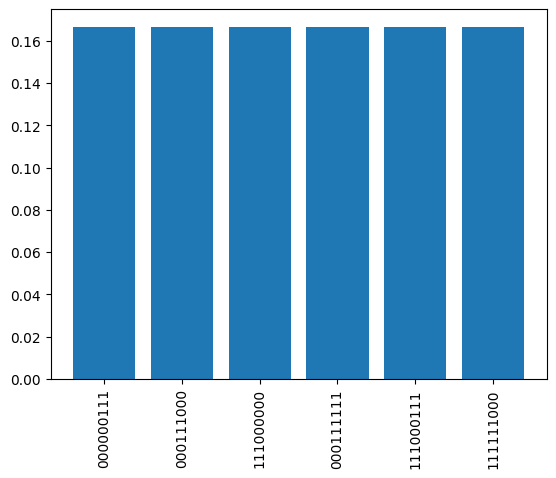

In [6]:
DATA_b3 = DiscreteProbabilityDistribution(Counter( bas.horizontal_bars()  ))

plot_bargraph_desc_order(DATA_b3)

In [7]:
# wt=hebbing_learning(bas.bas_dict['bars'])
# # creating ising model for the bas stripes only dataset
# n_spins=gridsize*gridsize
# shape_of_J=(n_spins,n_spins)
# J=-1*wt
# h=np.zeros(n_spins)
# model=IsingEnergyFunction(J,h,name=f'ising model BAS {n_spins}X{n_spins} bars only')
# #model.model_summary()

##### Prepare parameterized model

     MODEL : param_model |  beta : 1.0
Num Most Probable States : 21
Entropy : 6.266491818450897
---------------------------------------------


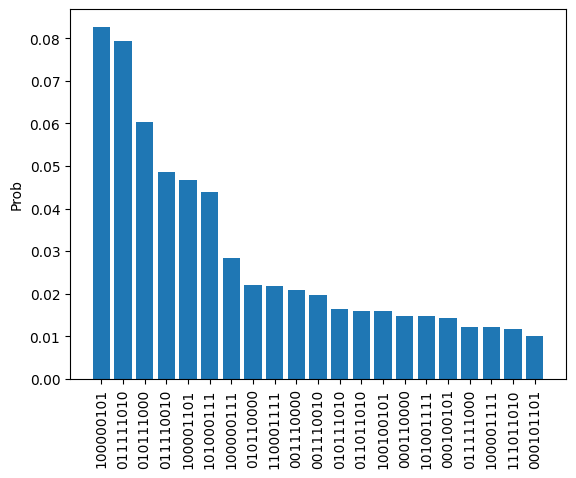

In [8]:
nspin = len(list(DATA_b3.keys())[0])
param_model = random_ising_model(nspin, 9671032, print_model= False)
beta_train = 1.0
param_model_exm = Exact_Sampling(param_model, beta= beta_train)
param_model_exm.sampling_summary()

#### Training 

In [11]:
MCMC_SETTINGS = {
                'qu-wt1': {'mcmc_type': 'quantum-enhanced' , 'mixer' : [ [['random', 1]] , [] ] },
                'qu-wt3':{'mcmc_type': 'quantum-enhanced' , 'mixer' : [ [['random', 3]] , [] ] },
                'qu-wt2':{'mcmc_type': 'quantum-enhanced' , 'mixer' : [ [['random', 2]] , [] ] },
                'qu-alt-wt1-wt3' : {'mcmc_type': 'quantum-enhanced' , 'mixer' : [ [['random', 3], ['random', 1]] , [0.5, 0.5] ] },
                'qu-stabilizers-wt3': {'mcmc_type': 'quantum-enhanced' , 'mixer' : [ [['custom', [[0,1,2], [3,4,5], [6,7,8]] ]], []] },
                'cl-uniform': {'mcmc_type': 'classical' , 'mixer' : [  [['uniform']], [] ] }, 
                'cl-local-wt3': {'mcmc_type': 'classical' , 'mixer' : [  [['local', 3]], [] ] },
                'cl-alt-wt1-wt3': {'mcmc_type': 'classical' , 'mixer' : [  [['local', 3], ['local', 1]], [0.5, 0.5] ] } 
                }

EPOCHS = 300 
MCMC_STEPS = 1000
lr = 0.02



##### Experiment E0

In [9]:
## load experiment ##
# TRAININGEXPERIMENT_BAS3_0 = {mcmc_type: cd_training(param_model, beta_train, DATA_b3, name= mcmc_type) for mcmc_type in MCMC_SETTINGS.keys()}

# name = "TrainingExperiments/BAS3/TRAININGEXPERIMENT_BAS3_0.pkl"
# with open(name, 'rb') as f : TRAININGEXPERIMENT_BAS3_0 = pickle.load(f)

In [10]:
# name = "TrainingExperiments/BAS3/TRAININGEXPERIMENT_BAS3_0.pkl"
# for mcmc_type in tqdm(MCMC_SETTINGS.keys()) :
    
#     TRAININGEXPERIMENT_BAS3_0[mcmc_type].train(lr = lr, mcmc_settings= MCMC_SETTINGS[mcmc_type], epochs= EPOCHS , mcmc_steps= MCMC_STEPS, show_kldiv= True)  ## show_kldiv should be TRUE for training history to be stored
#     with open(name, 'wb') as f:  pickle.dump(TRAININGEXPERIMENT_BAS3_0, f)

In [53]:
##  save experiment ##
# name = "TrainingExperiments/BAS3/TRAININGEXPERIMENT_BAS3_0.pkl"
# with open(name, 'rb') as f : TRAININGEXPERIMENT_BAS3_0 = pickle.load(f)

##### Experiment E1

In [52]:
# # DATA_E = {mcmc_type: cd_training(param_model, beta_train, DATA_b3, name= mcmc_type) for mcmc_type in ['qu-wt1', 'qu-wt2', 'qu-wt3', 'qu-stabilizers-wt3', 'cl-uniform' , 'cl-local-wt3' ] }
# EPOCHS = 300 
# MCMC_STEPS = 1000
# lr = 0.02


# name = "TrainingExperiments/BAS3/TRAININGEXPERIMENT_1_BAS3.pkl"
# with open(name, 'rb')  as f :  DATA_E = pickle.load(f)

# # for mcmc_type in DATA_E.keys() :
# #     DATA_E[mcmc_type].train(lr =lr, mcmc_settings= MCMC_SETTINGS[mcmc_type], epochs= EPOCHS, mcmc_steps= MCMC_STEPS, verbose= True)
# #     with open(name, 'wb') as f:  pickle.dump(DATA_E, f)
    
# DATA_E.keys()

##### Experiment E2

In [12]:
name = "TrainingExperiments/BAS3/TRAININGEXPERIMENT_2_BAS3.pkl"
with open(name, 'rb')  as f :  DATA_E = pickle.load(f)

DATA_E.keys()

dict_keys(['qu-wt1', 'qu-wt2', 'qu-wt3', 'qu-stabilizers-wt3', 'cl-uniform', 'cl-local-wt3'])

### ANALYSIS

In [13]:
types_for_plot = ['qu-wt1', 'qu-wt2', 'qu-wt3' ,'qu-stabilizers-wt3', 'cl-uniform', 'cl-local-wt3' ] ## experiments for other mcmc types were not run yet !

##### KL Div

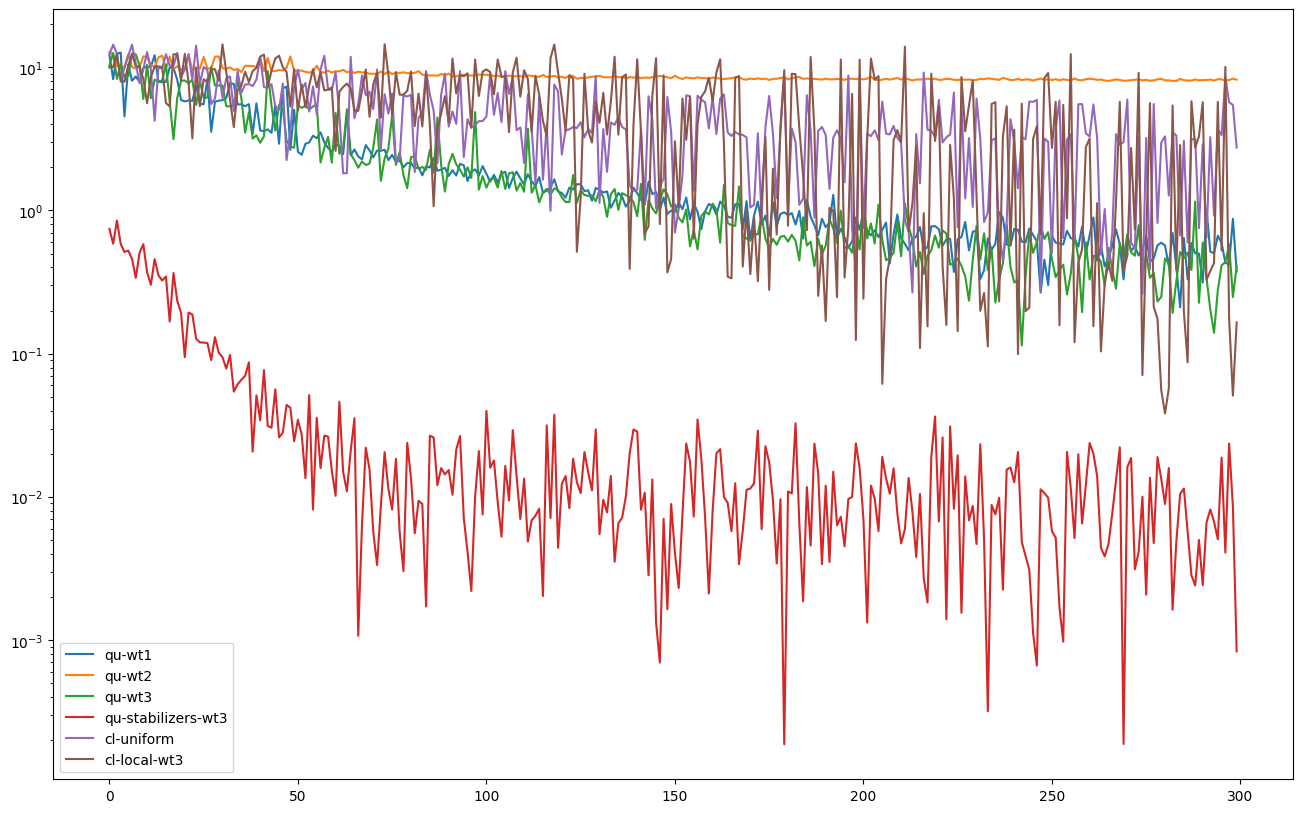

In [14]:
plt.figure(figsize=(16,10))
for mcmc_type in types_for_plot:
    plt.plot(DATA_E[mcmc_type].training_history['kl_div'], label = mcmc_type)
    
plt.yscale('log')
plt.legend()
plt.show()


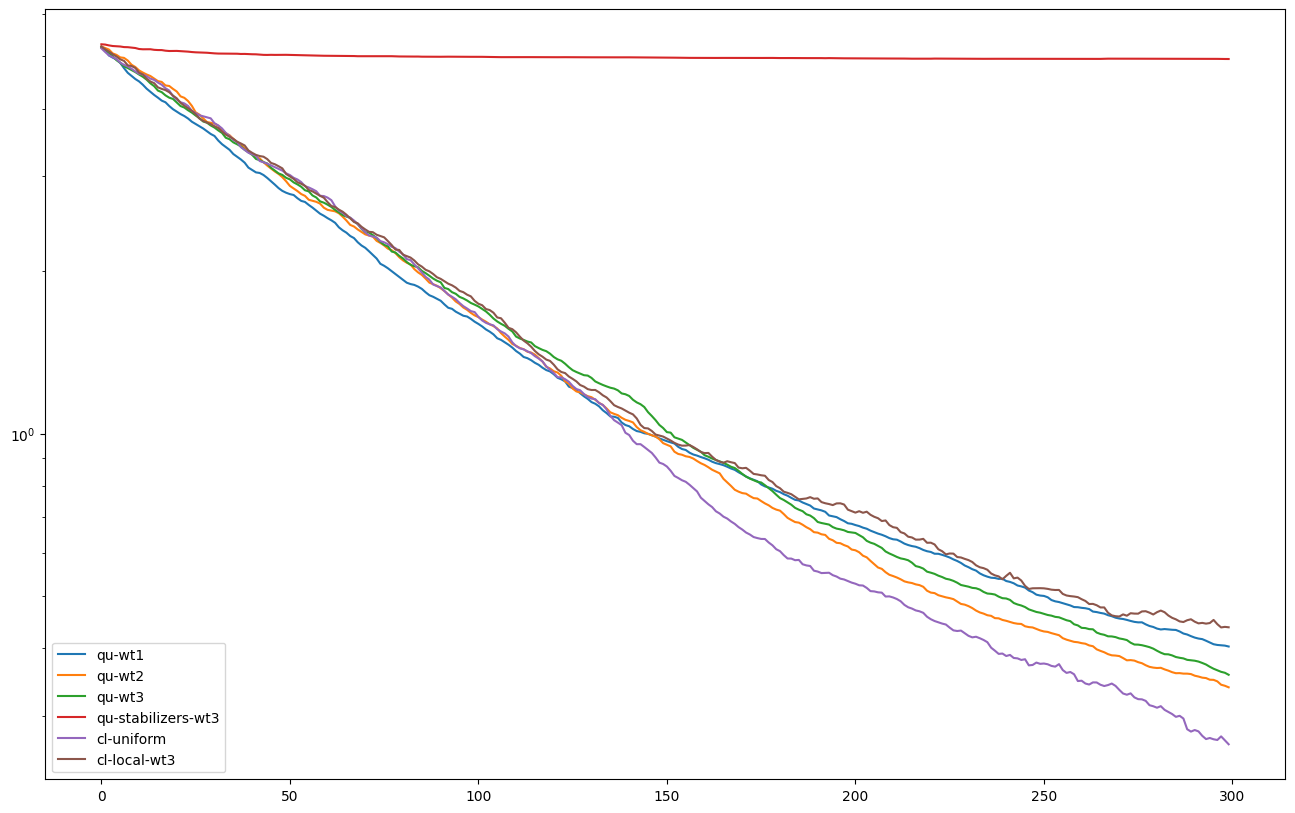

In [77]:
plt.figure(figsize=(16,10))
for mcmc_type in types_for_plot:
    plt.plot(DATA_E0[mcmc_type].training_history['kl_div'], label = mcmc_type)
    
plt.yscale('log')
plt.legend()
plt.show()


##### Gradient Var

In [56]:
def GradientVariationPlot(data, figsize= (25,16)):
    fig, (ax0, ax1) = plt.subplots(2,1, figsize = figsize)
    
    x_axis = list(range(len(data)))

    ## restructure data
    J_max = []; J_min= []; J_mean= []; h_max= []; h_min= []; h_mean= []
    for i in x_axis:
        J_max.append(data[i][0][0])
        J_min.append(data[i][0][1])
        J_mean.append( 0.5 * (J_min[-1] + J_max[-1])  )

        h_max.append(data[i][1][0])
        h_min.append(data[i][1][1])
        h_mean.append( 0.5 * (h_min[-1] + h_max[-1])  )

    ax0.plot(x_axis, J_mean, label = "gradient J")
    ax0.fill_between(x_axis, J_min, J_max, alpha =0.4)
    ax0.legend()
    # ax0.set_ylabel("var J")
    ax1.plot(x_axis, h_mean, label = "gradient h")
    ax1.fill_between(x_axis, h_min, h_max, alpha =0.4)
    ax1.legend()
    ax1.set_xlabel('Epochs')
    # ax1.set_ylabel("var h")
    
    # plt.title()
    plt.tight_layout()
    plt.show()
    

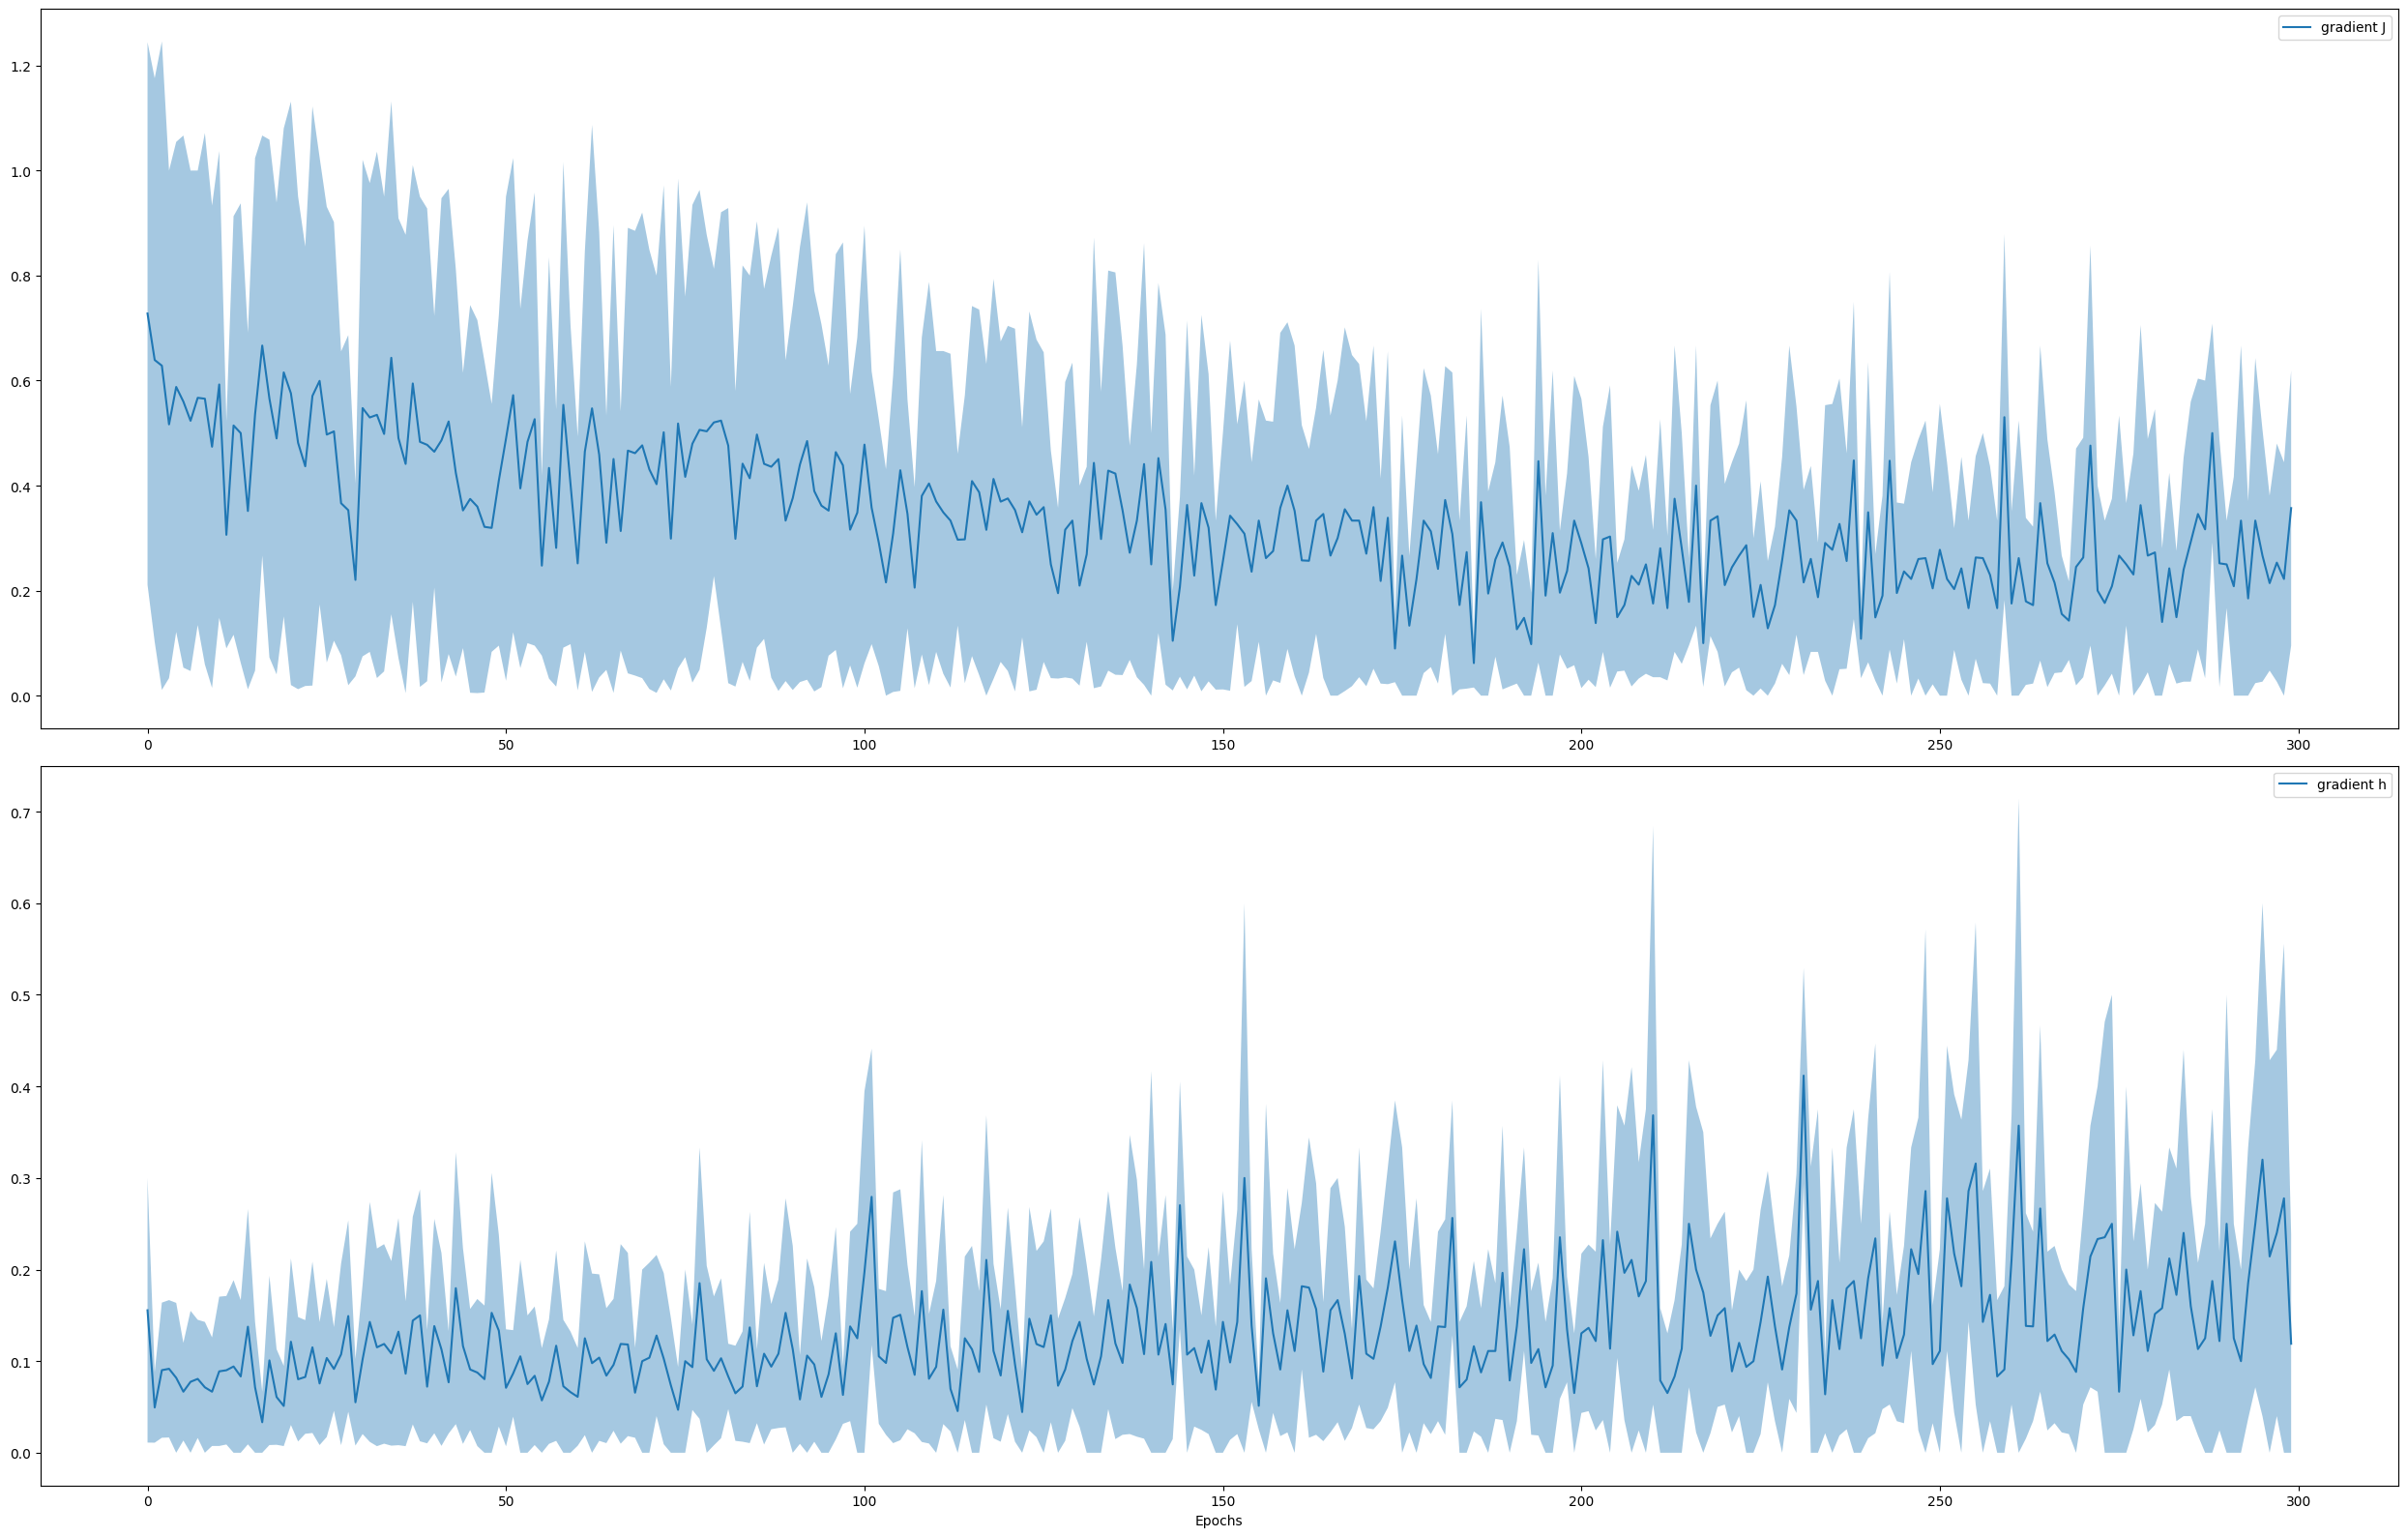

In [50]:
GradientVariationPlot(DATA_E0['cl-uniform'].training_history['max-min-gradient'])

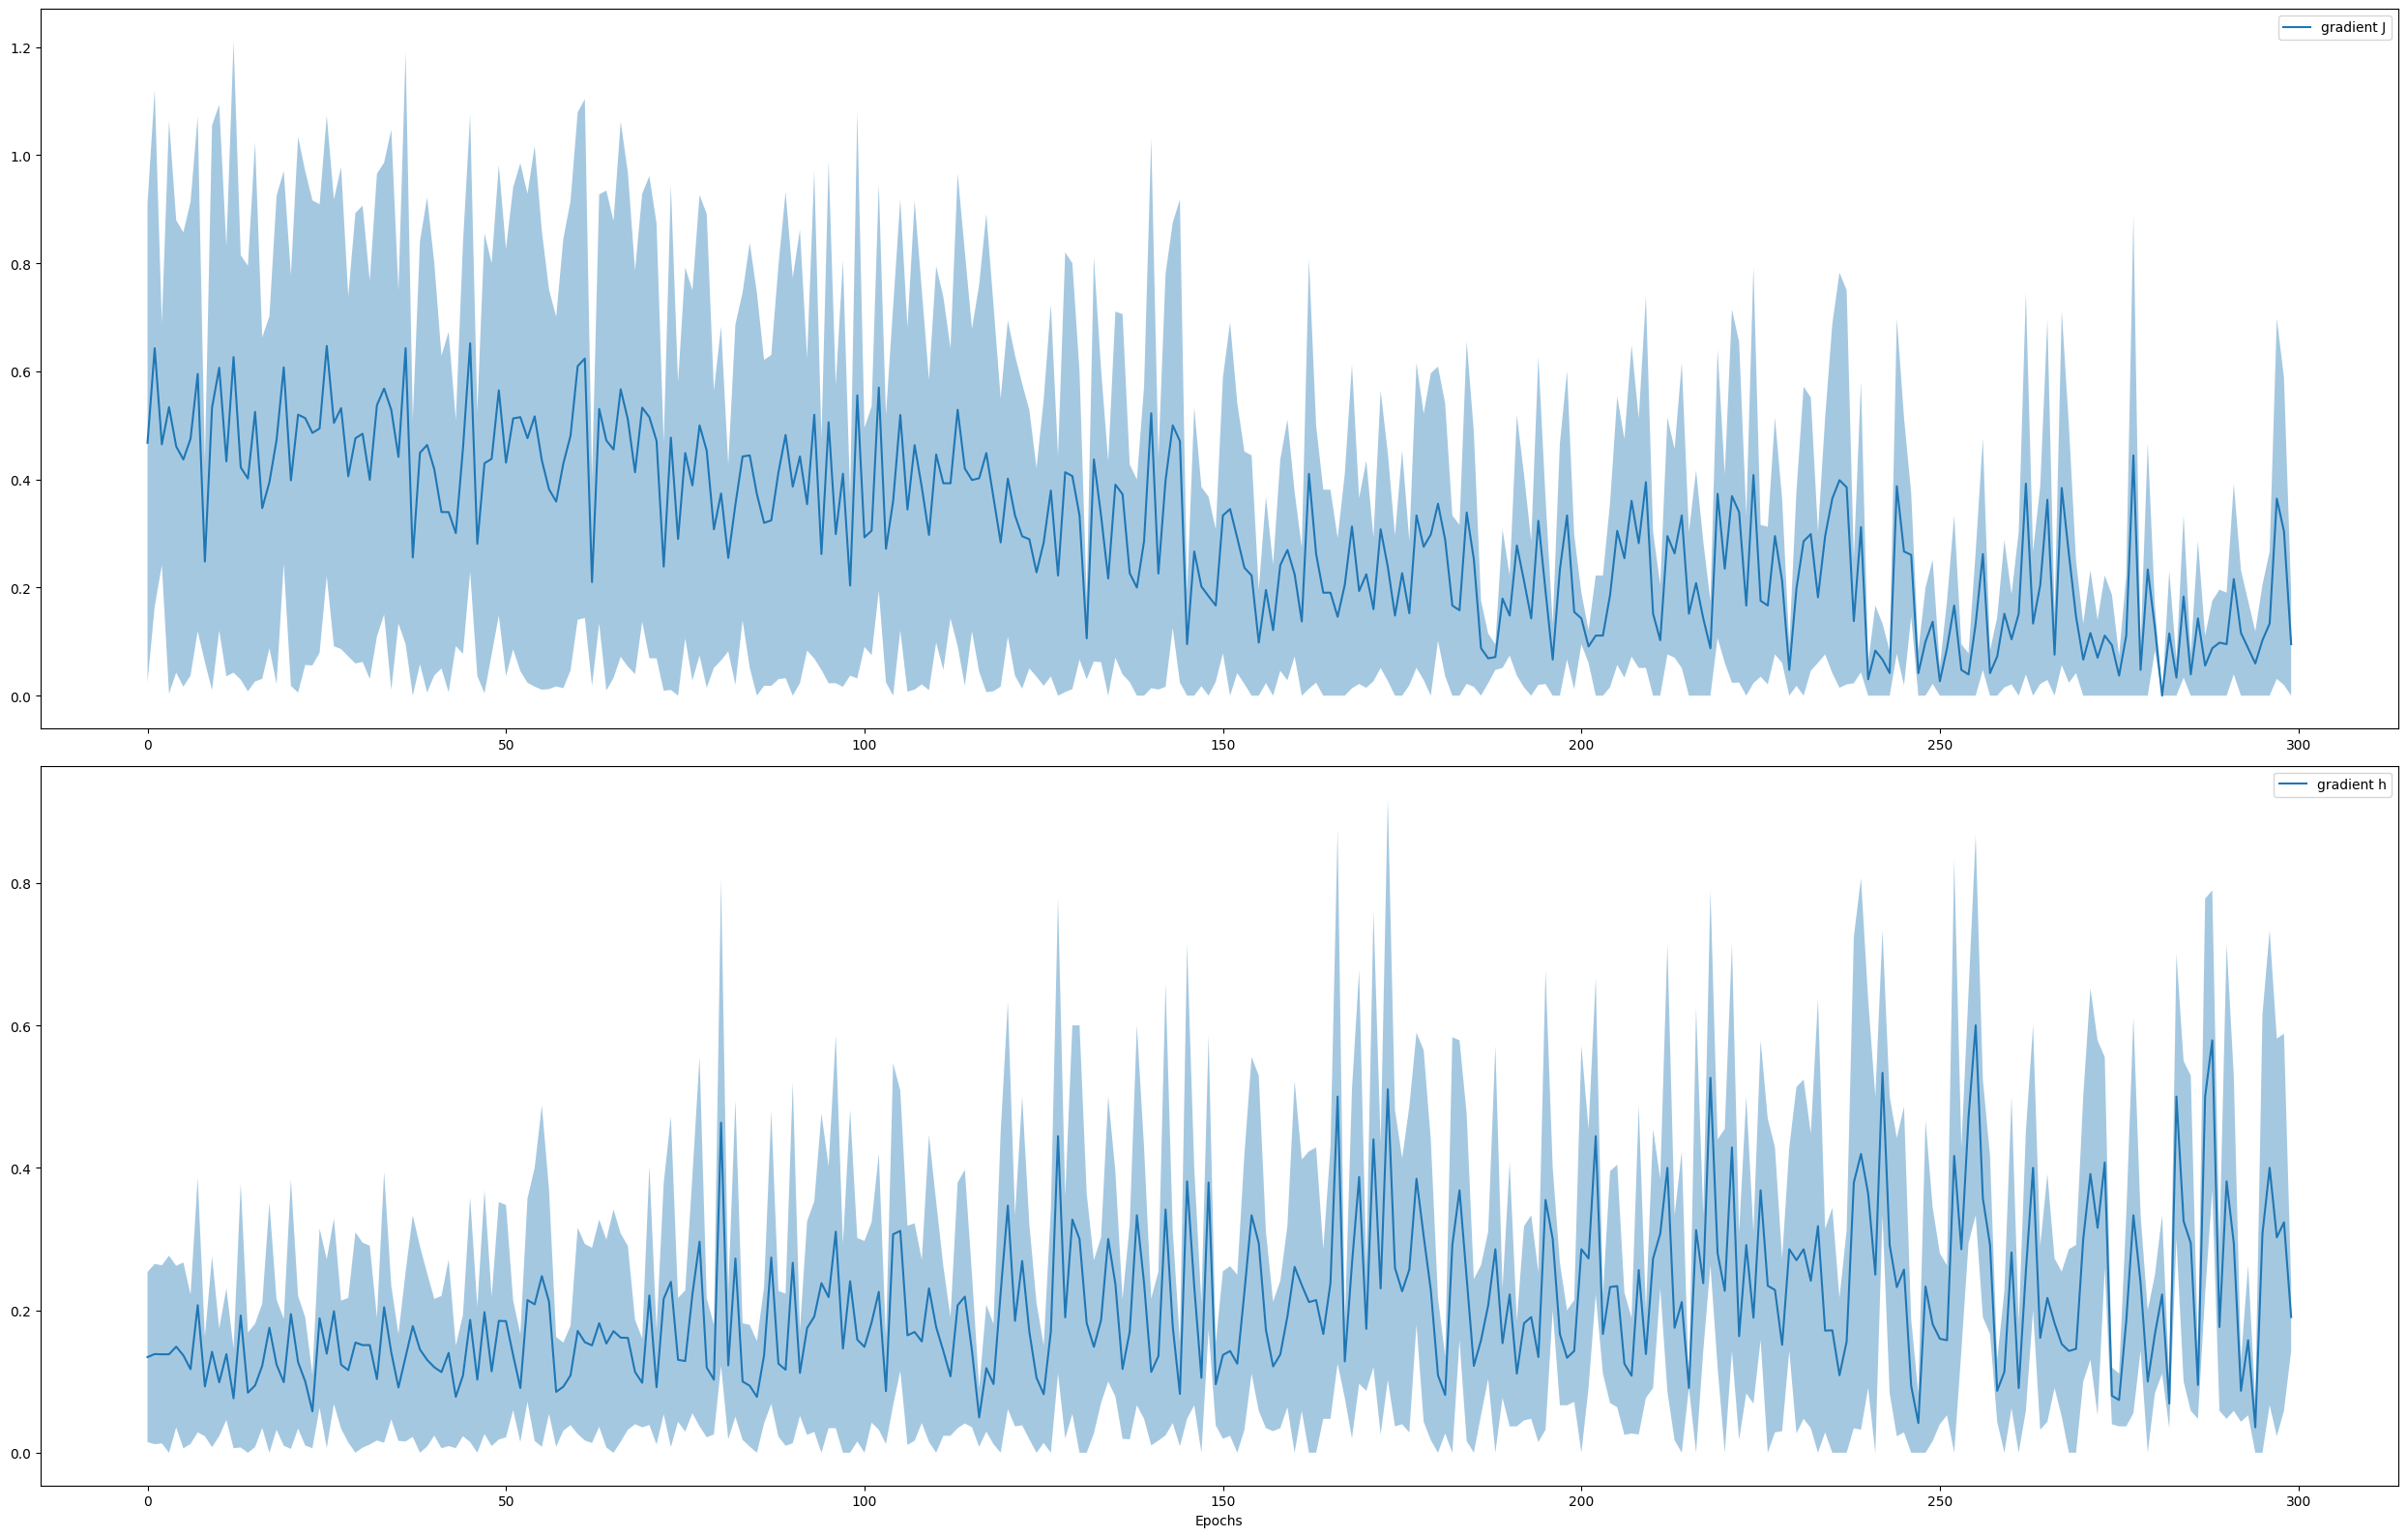

In [58]:
GradientVariationPlot(DATA_E0['cl-local-wt3'].training_history['max-min-gradient'])

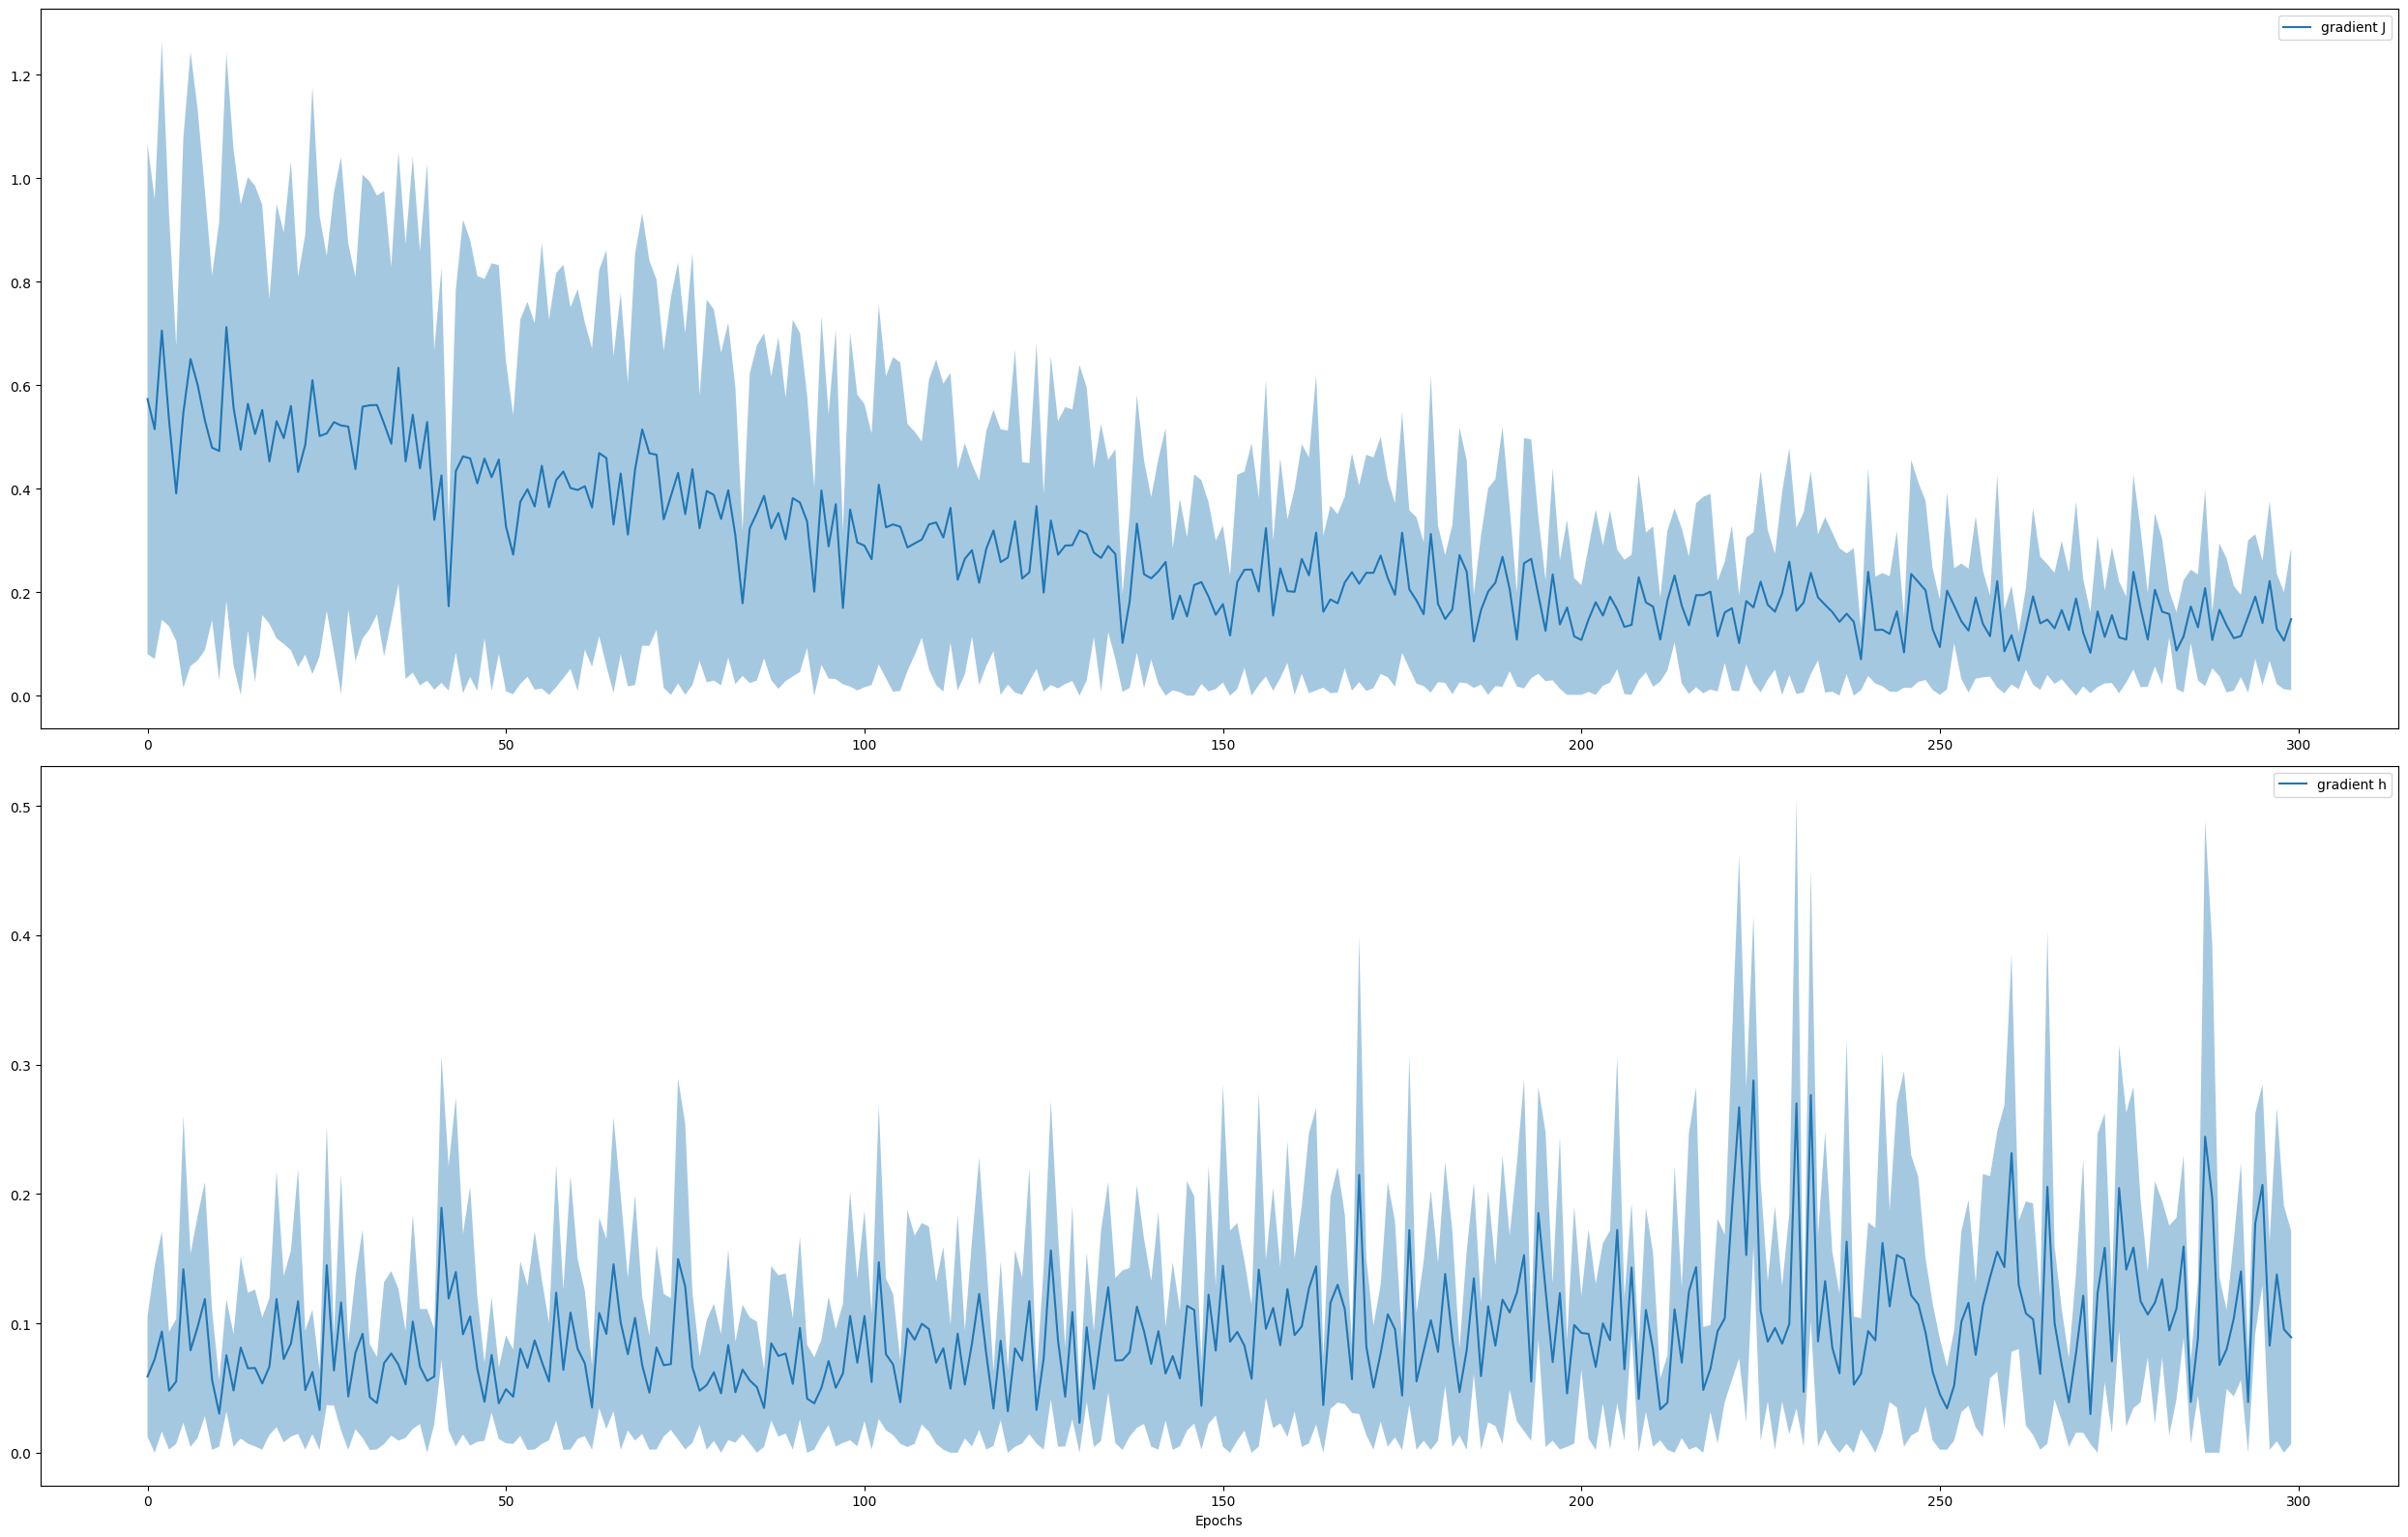

In [57]:
GradientVariationPlot(DATA_E0['qu-wt1'].training_history['max-min-gradient'])

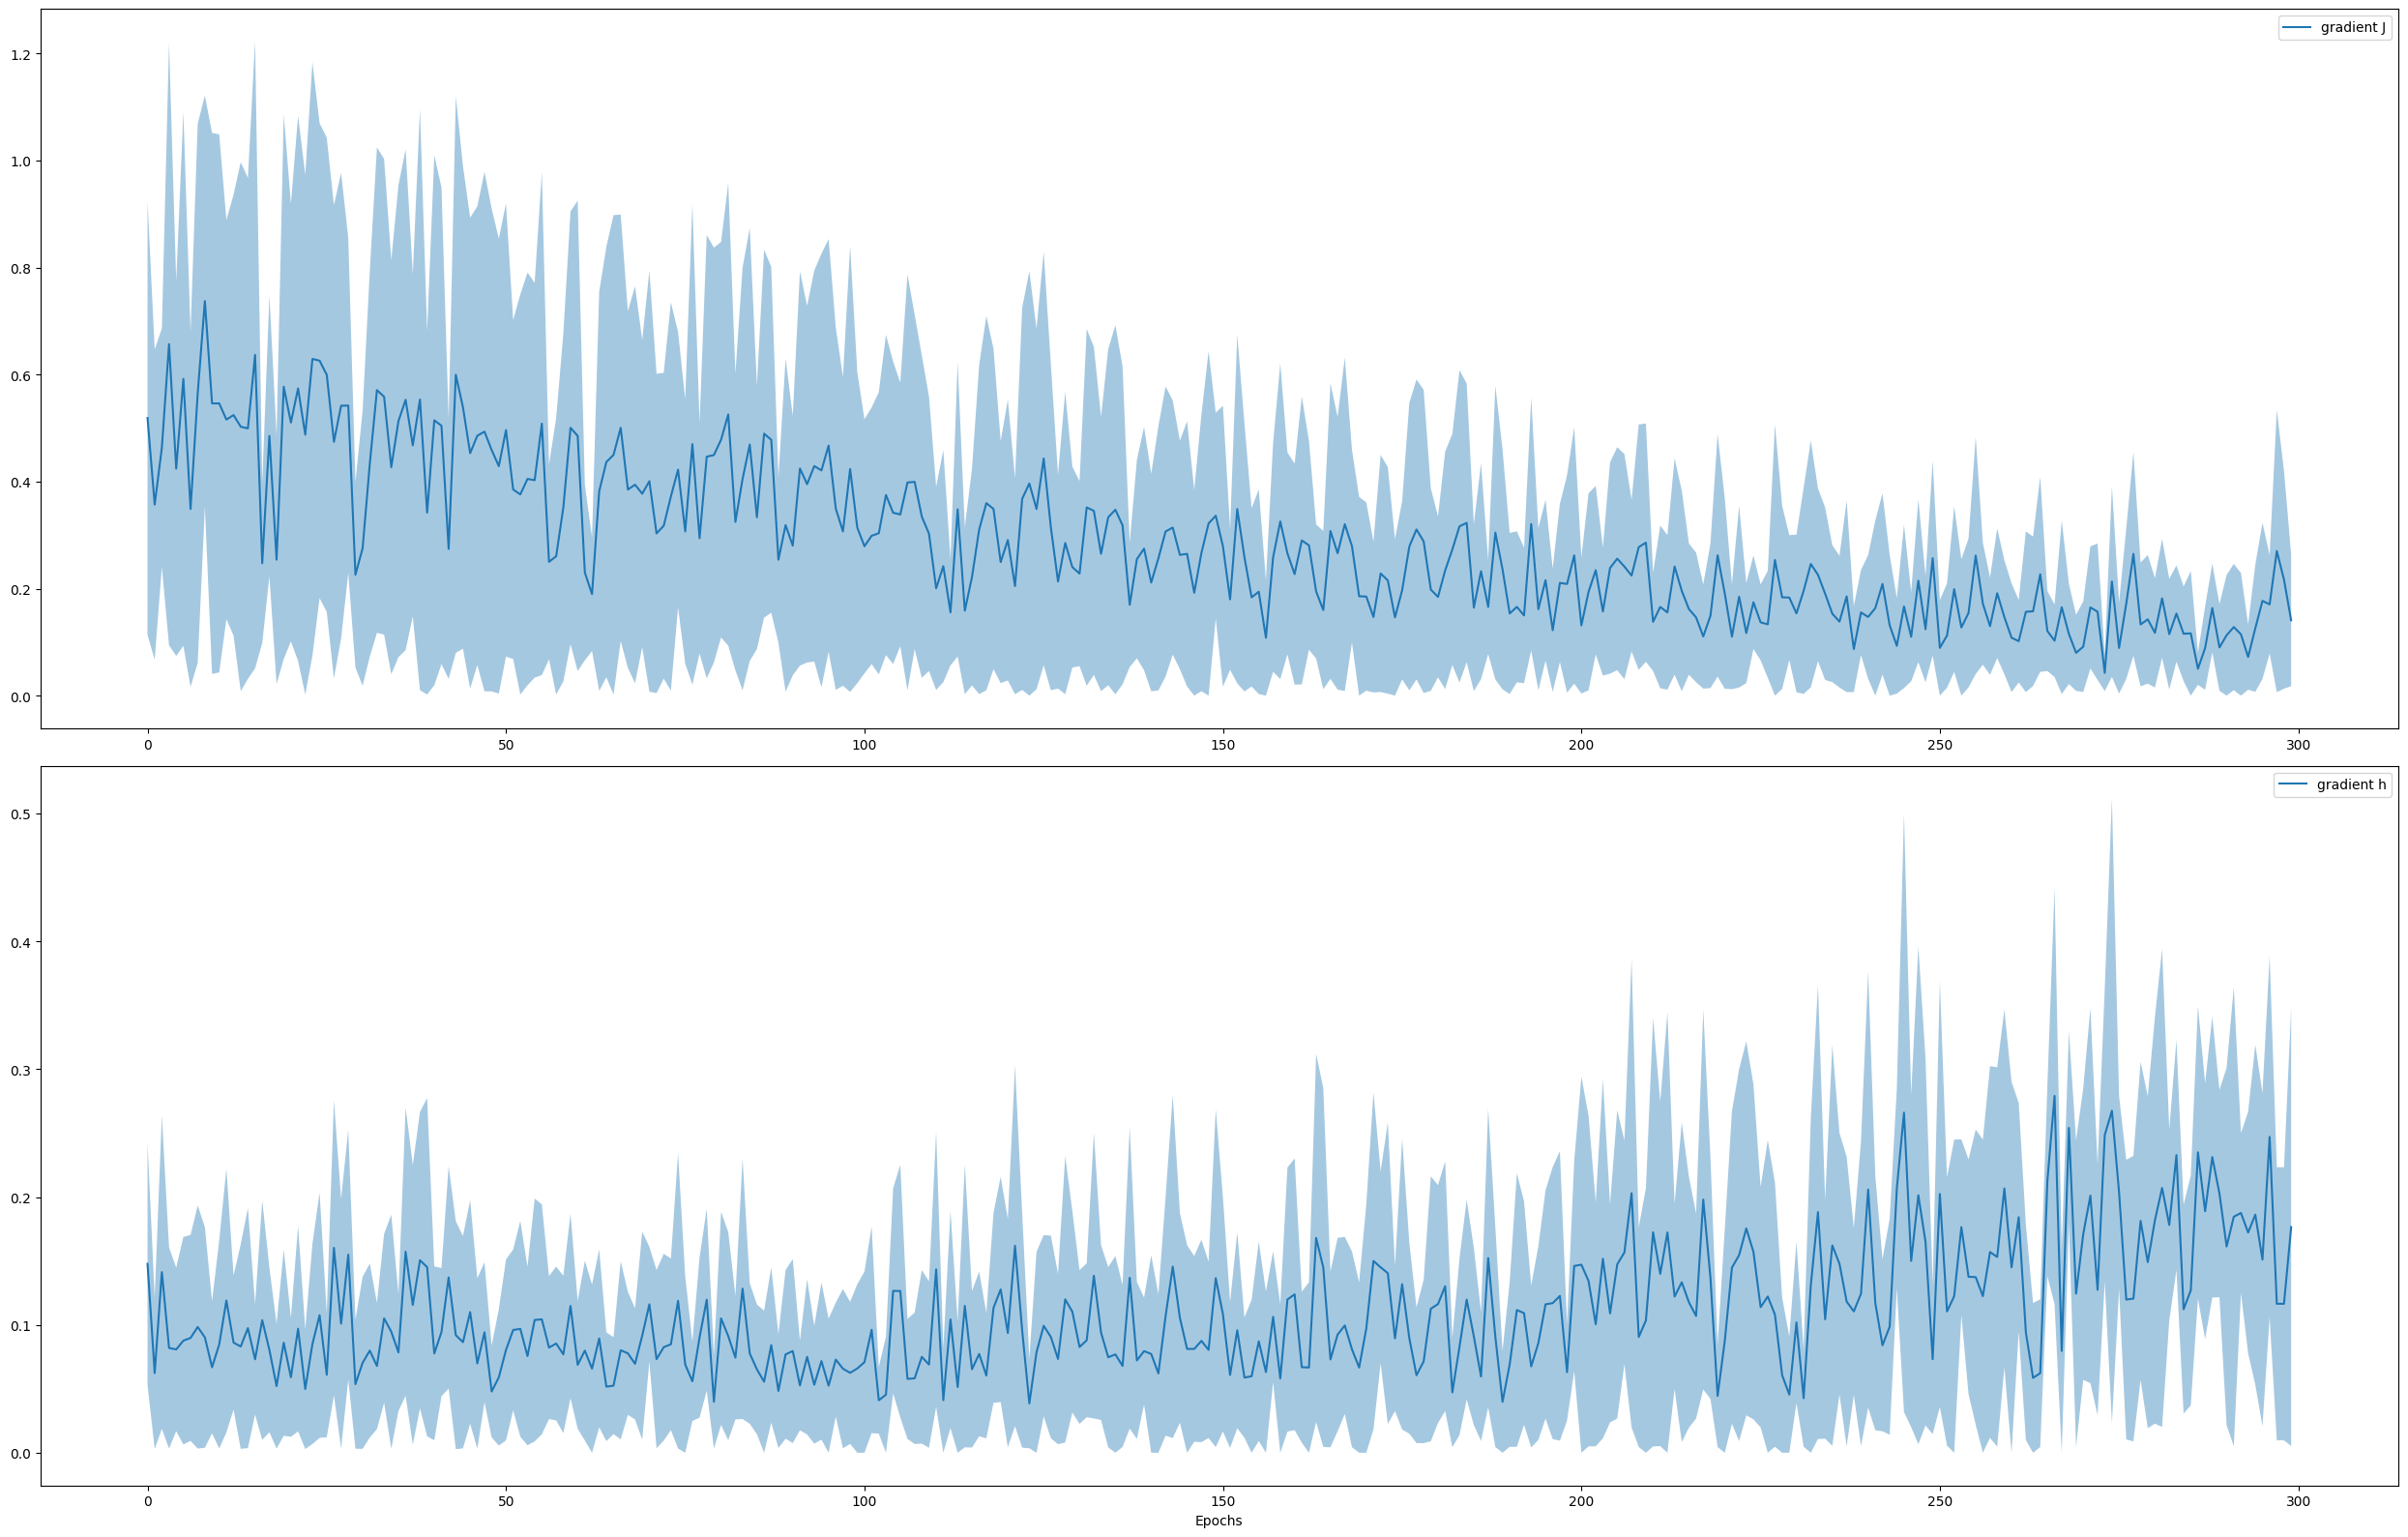

In [59]:
GradientVariationPlot(DATA_E0['qu-wt2'].training_history['max-min-gradient'])

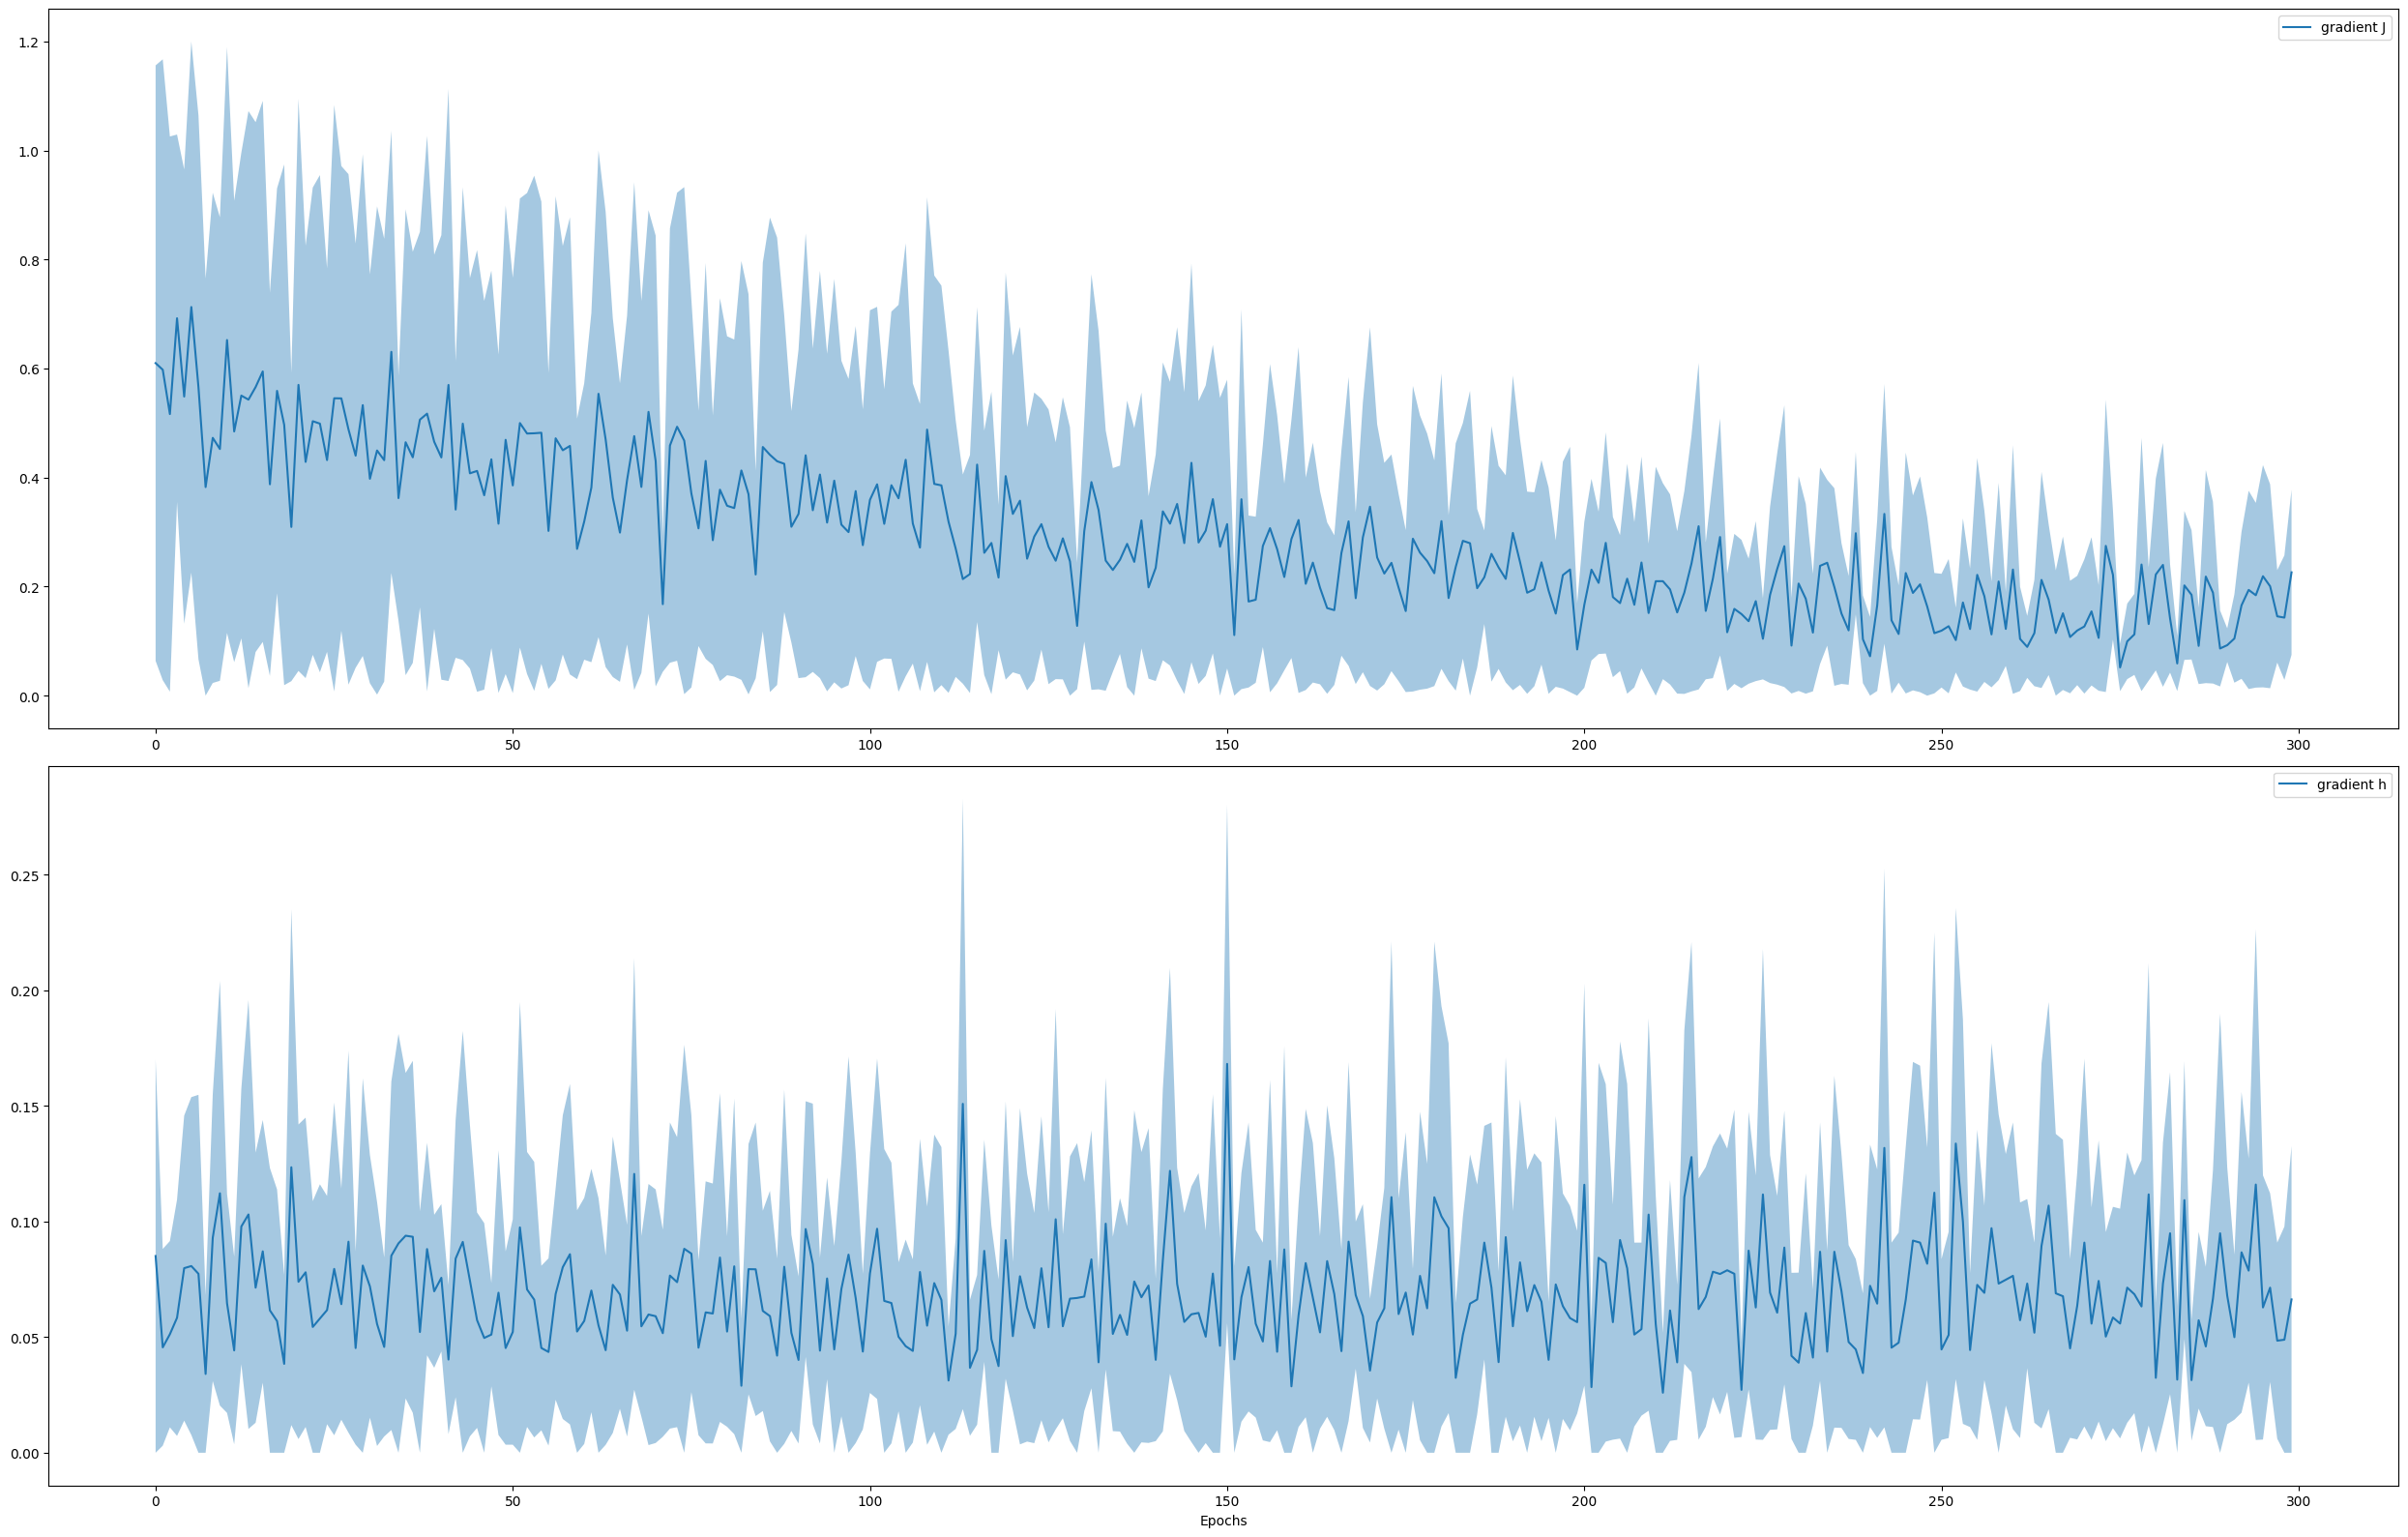

In [48]:
GradientVariationPlot(DATA_E0['qu-wt3'].training_history['max-min-gradient'])

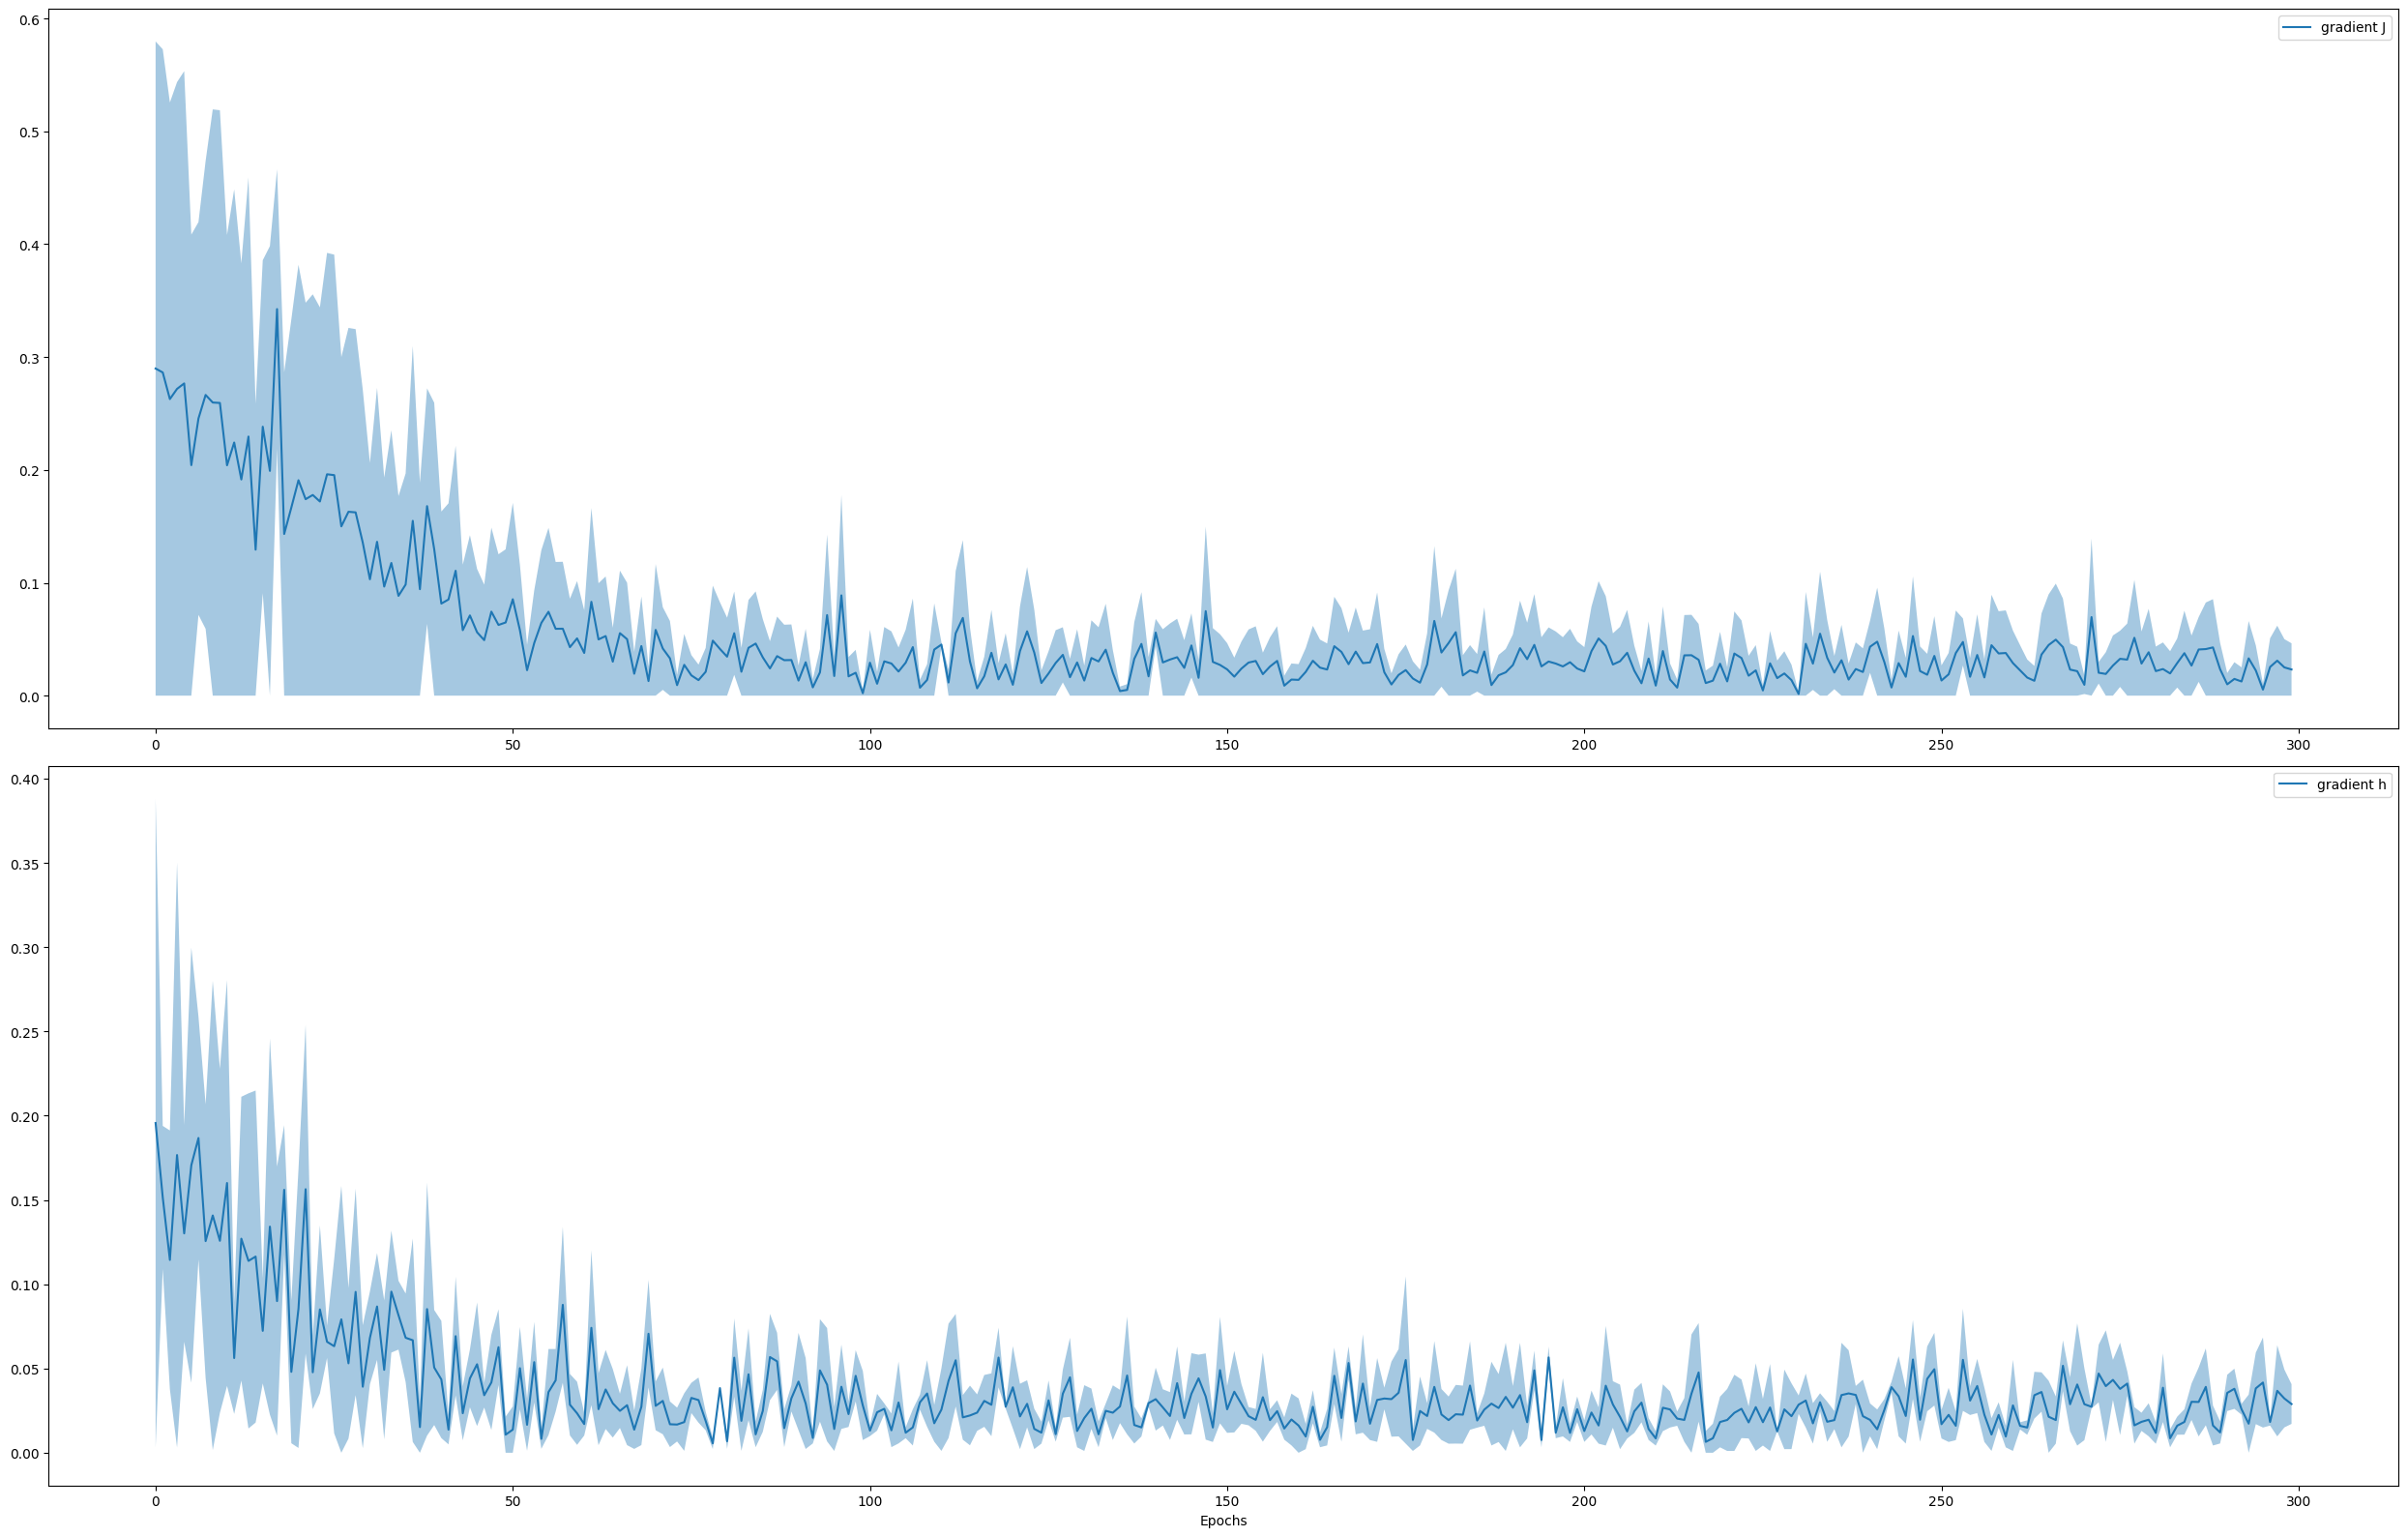

In [47]:
GradientVariationPlot(DATA_E0['qu-stabilizers-wt3'].training_history['max-min-gradient'])

##### Exact-Sampled  Trained Models 

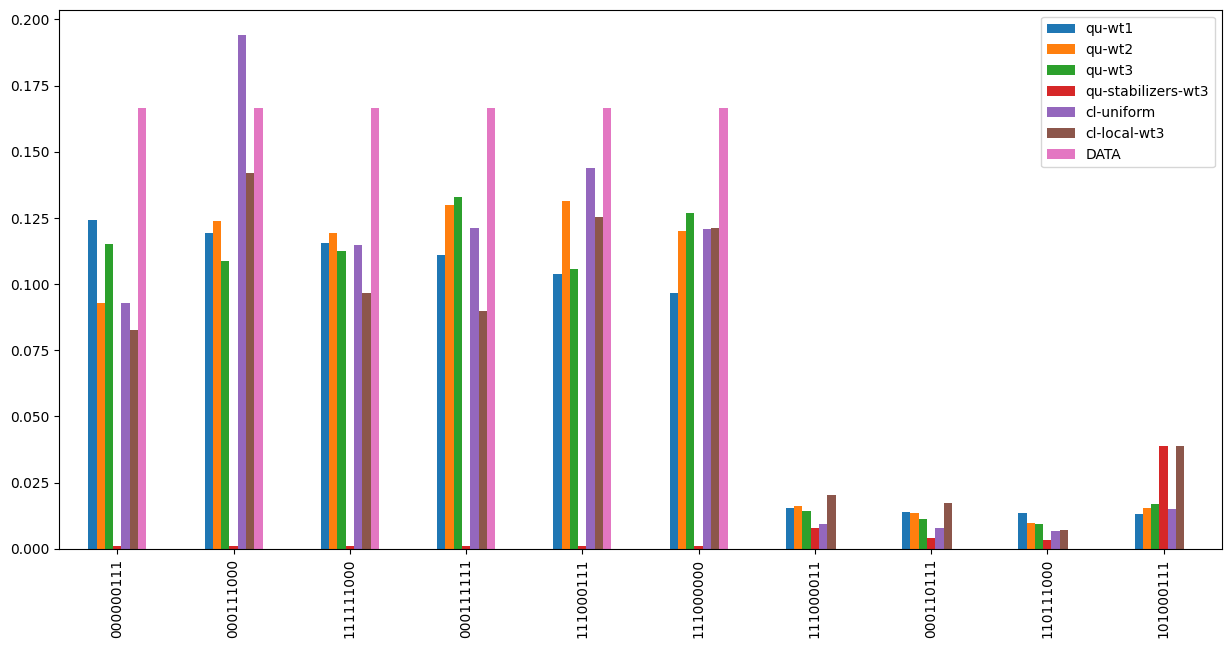

In [60]:
## Exact-Sampled all Trained Models ##
plot_multiple_bargraphs([ Exact_Sampling(DATA_E0[mcmc_type].model, beta_train).boltzmann_pd for mcmc_type in types_for_plot] + [DATA_b3], types_for_plot + ['DATA'], [False]*len(types_for_plot) + [False], plot_first_few= 10)    

##### MCMC Sampled Trained Methods

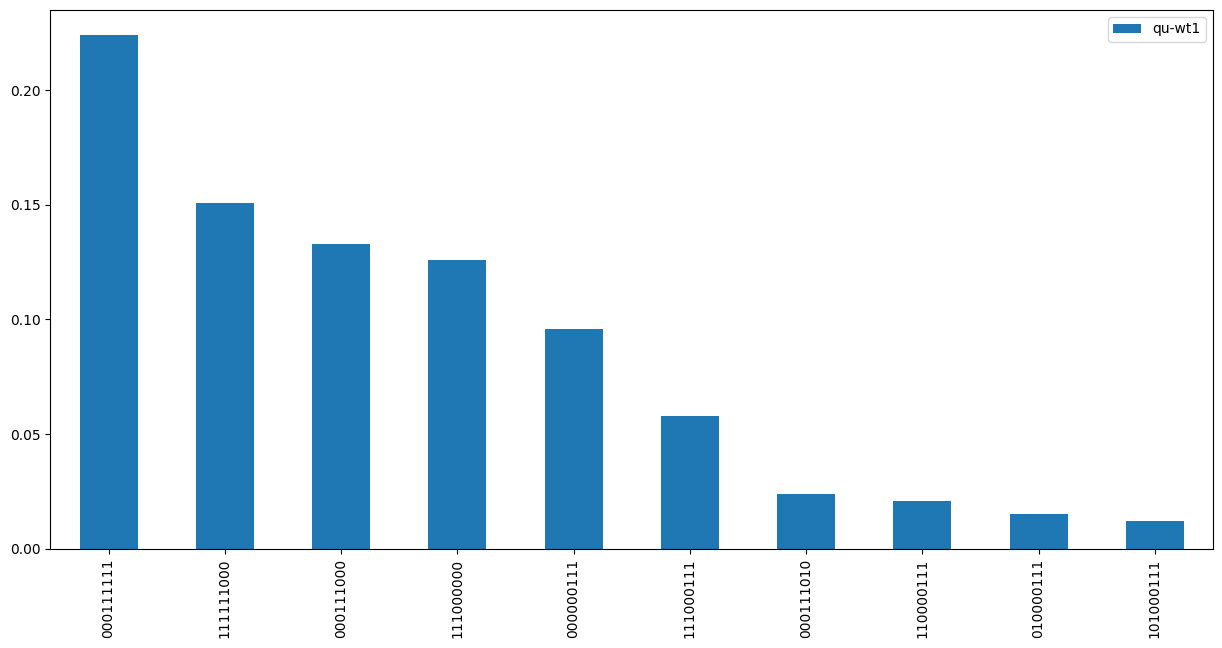

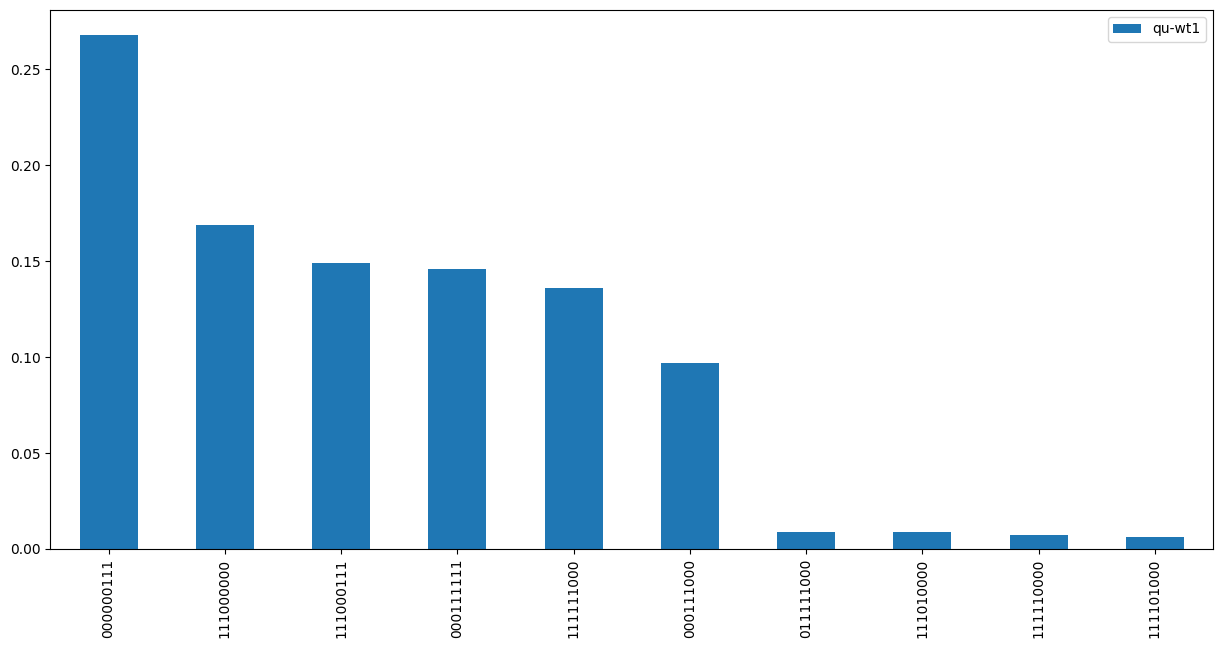

In [14]:
mcmc_type = 'qu-wt1' 
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, initial_state= DATA_b3.get_sample(1)[0] ,mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )

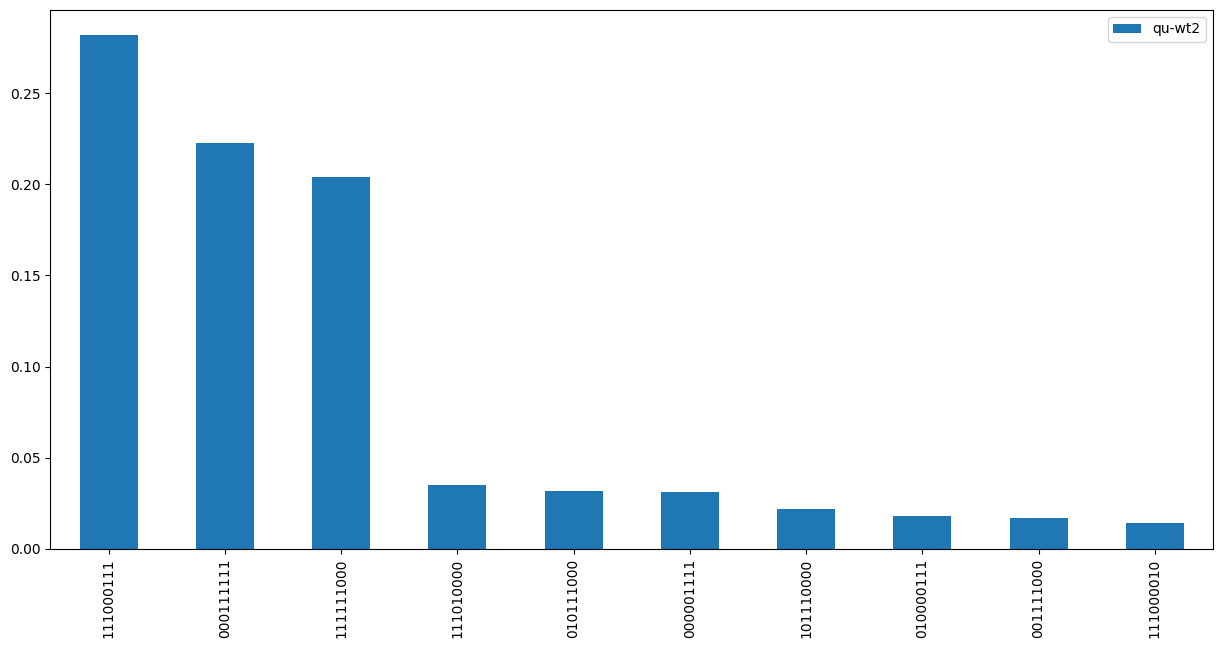

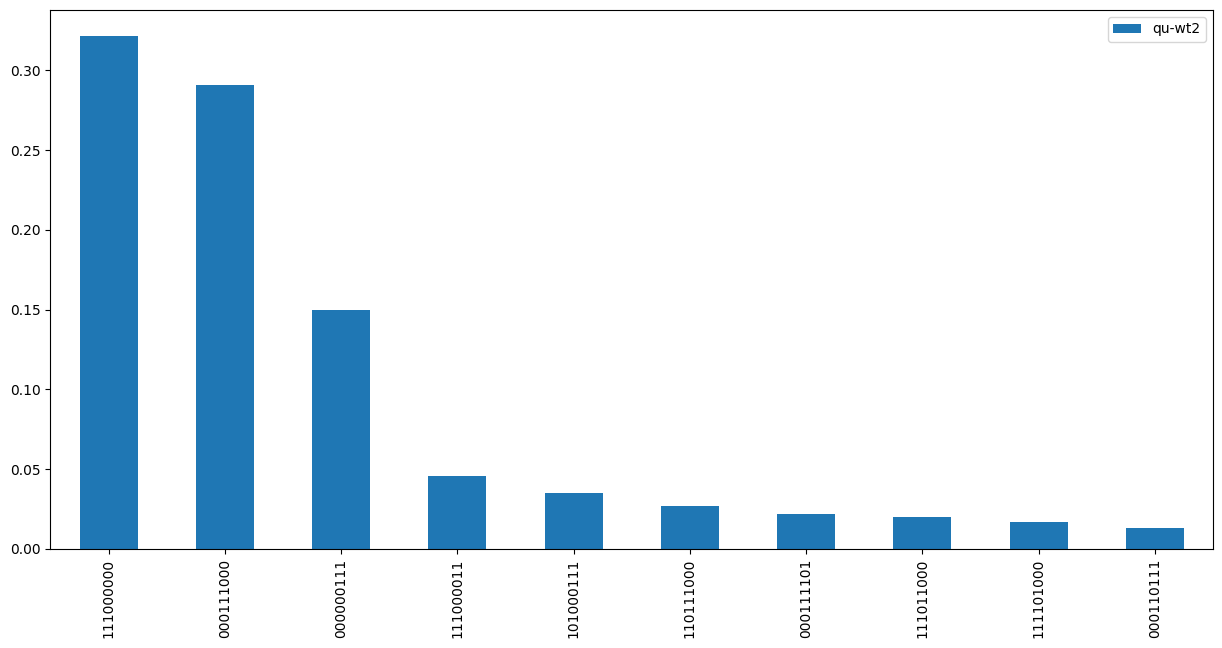

In [64]:
mcmc_type = 'qu-wt2' 
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, initial_state= DATA_b3.get_sample(1)[0] ,mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )

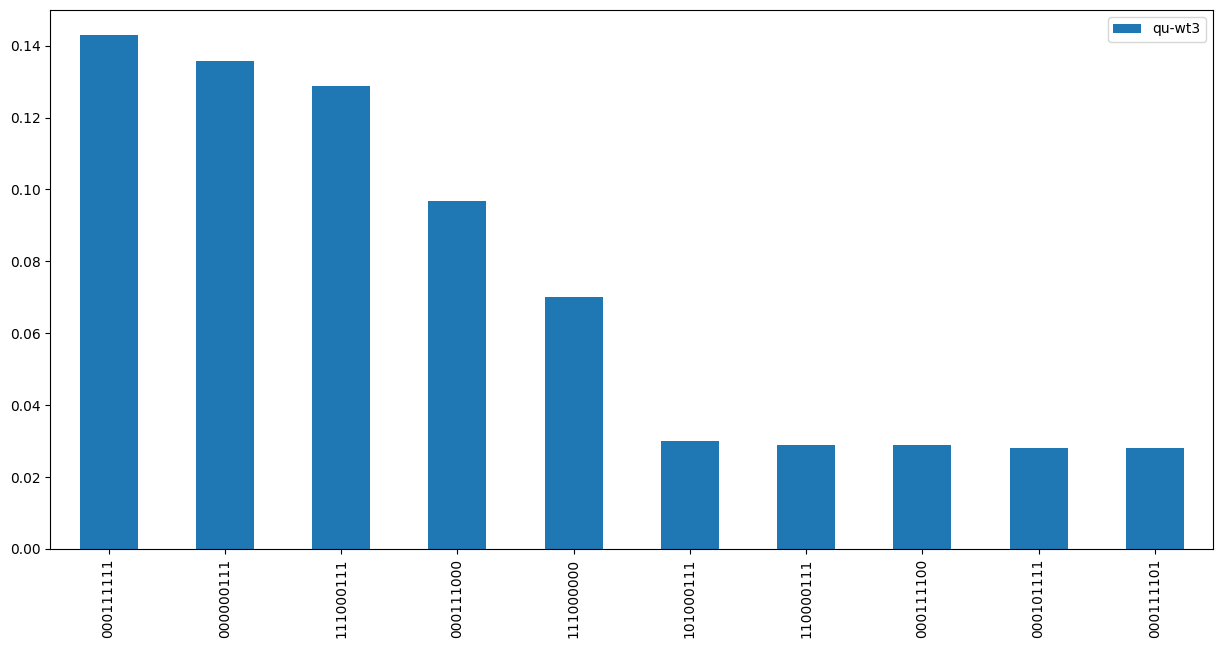

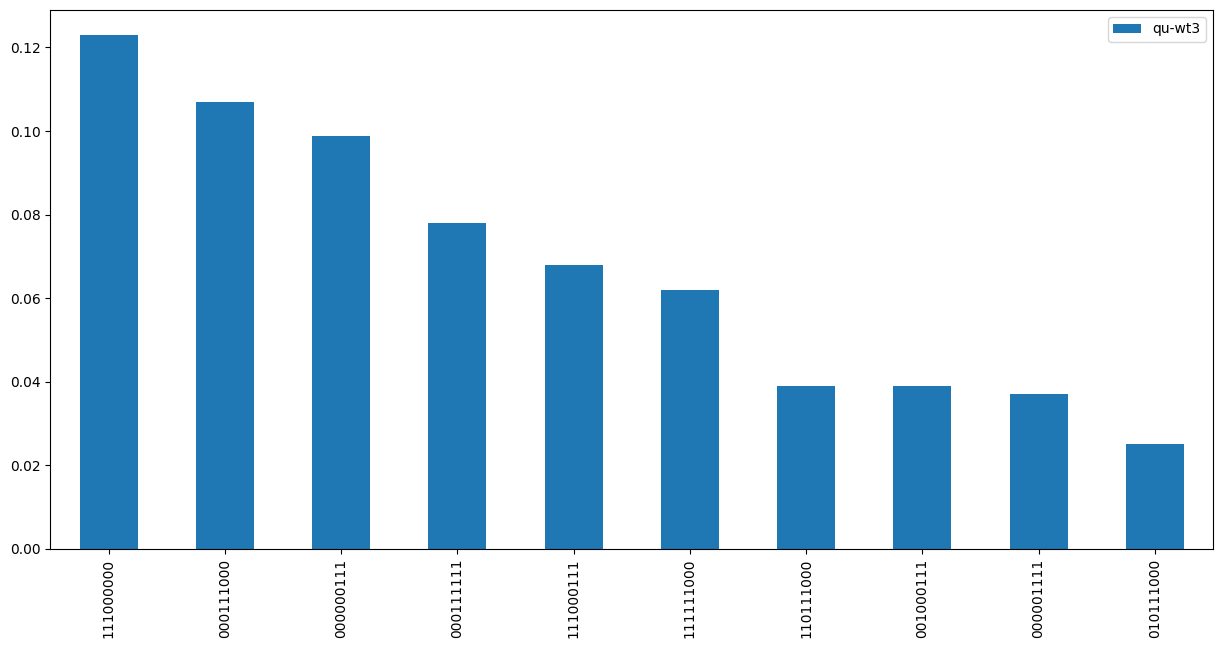

In [19]:
mcmc_type = 'qu-wt3' 
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, initial_state= DATA_b3.get_sample(1)[0] ,mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )

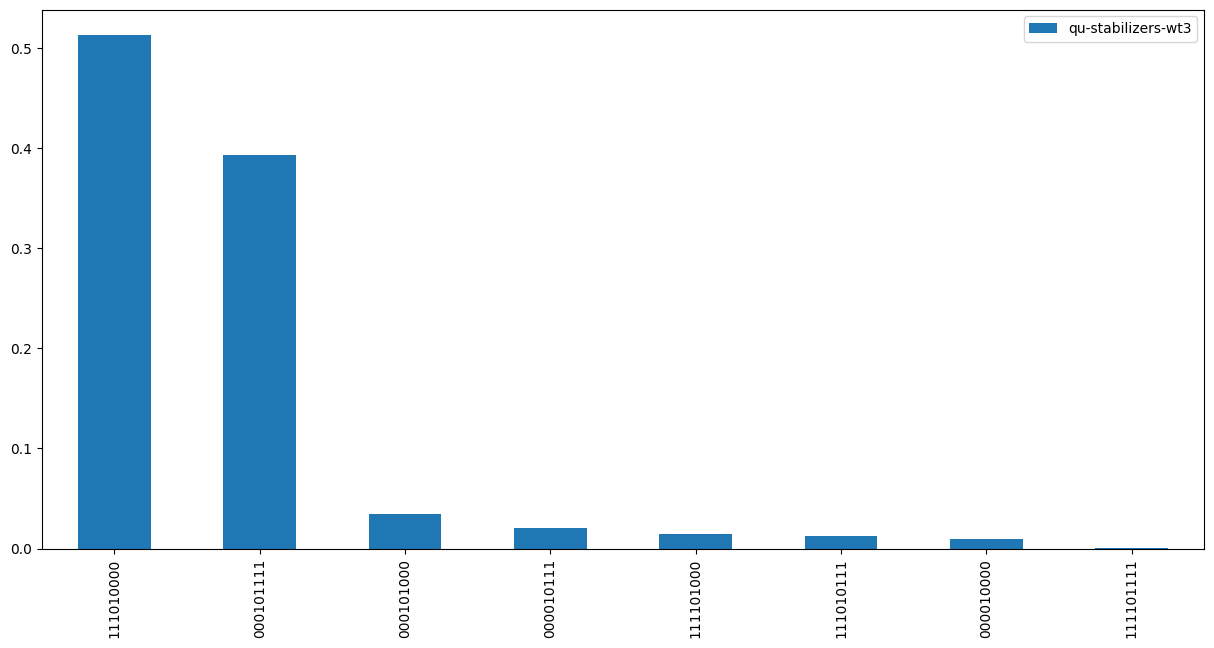

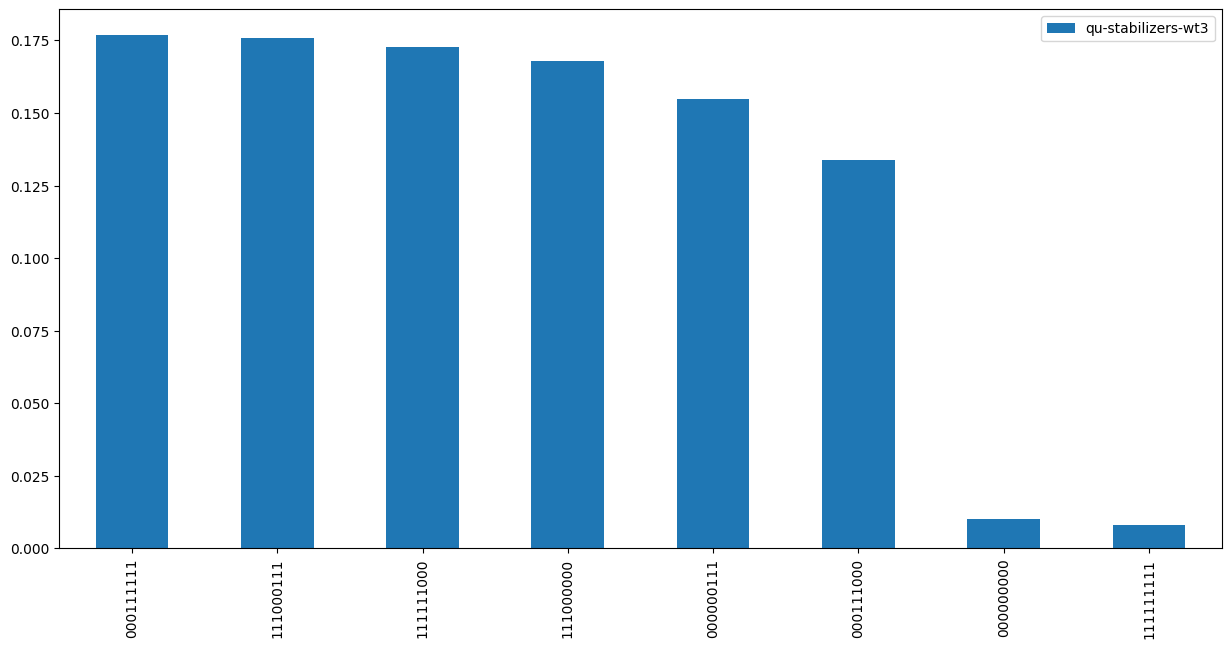

In [20]:
mcmc_type = 'qu-stabilizers-wt3' 
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(quantum_enhanced_mcmc_2(1000, DATA_E0[mcmc_type].model, temperature= beta_train, initial_state= DATA_b3.get_sample(1)[0] ,mixer= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )

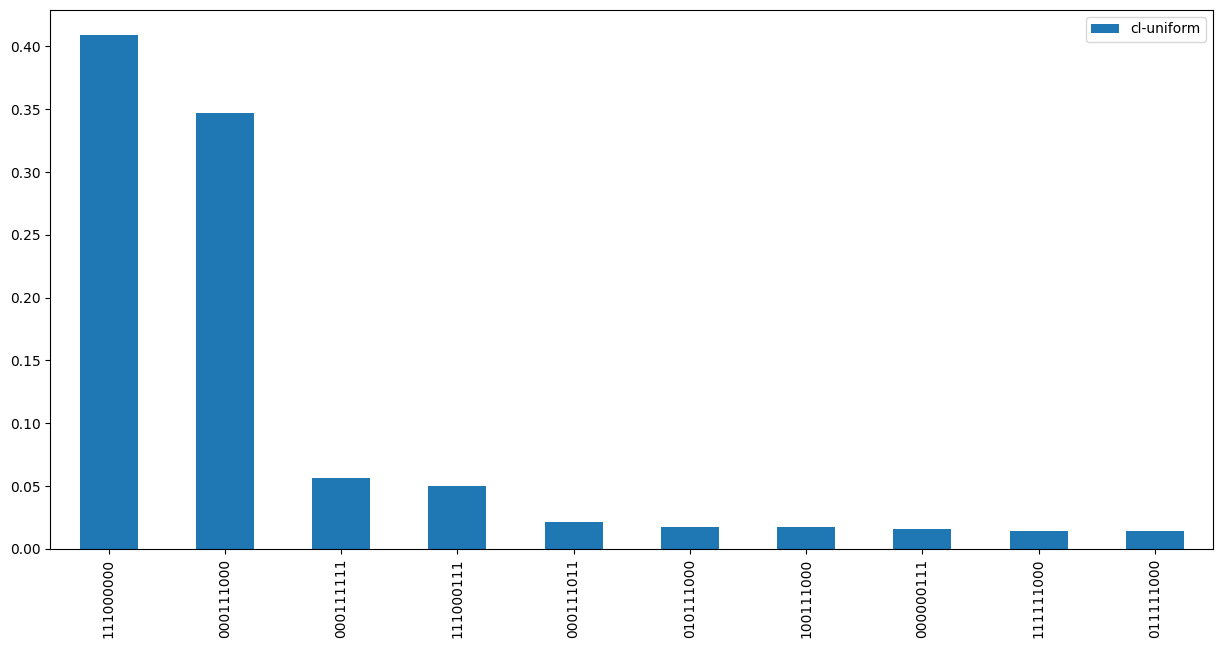

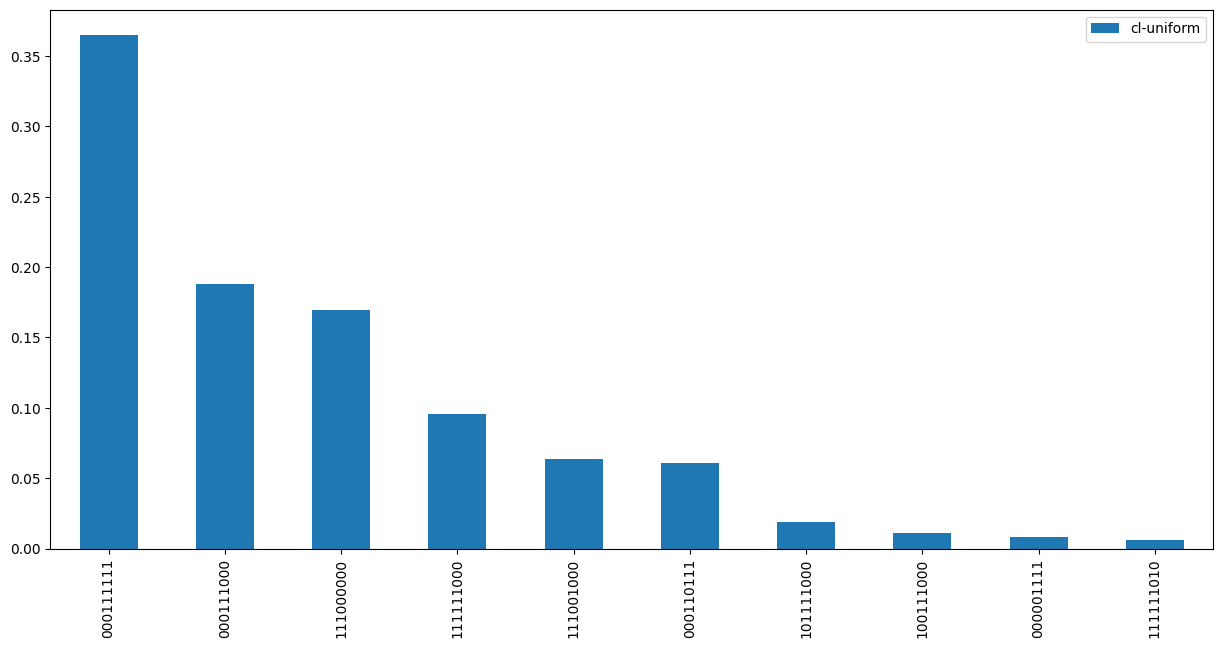

In [21]:
mcmc_type = 'cl-uniform' 
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(classical_mcmc(1000, DATA_E0[mcmc_type].model, temperature= beta_train,proposition_method= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(classical_mcmc(1000, DATA_E0[mcmc_type].model, temperature= beta_train,initial_state= DATA_b3.get_sample(1)[0] , proposition_method= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )

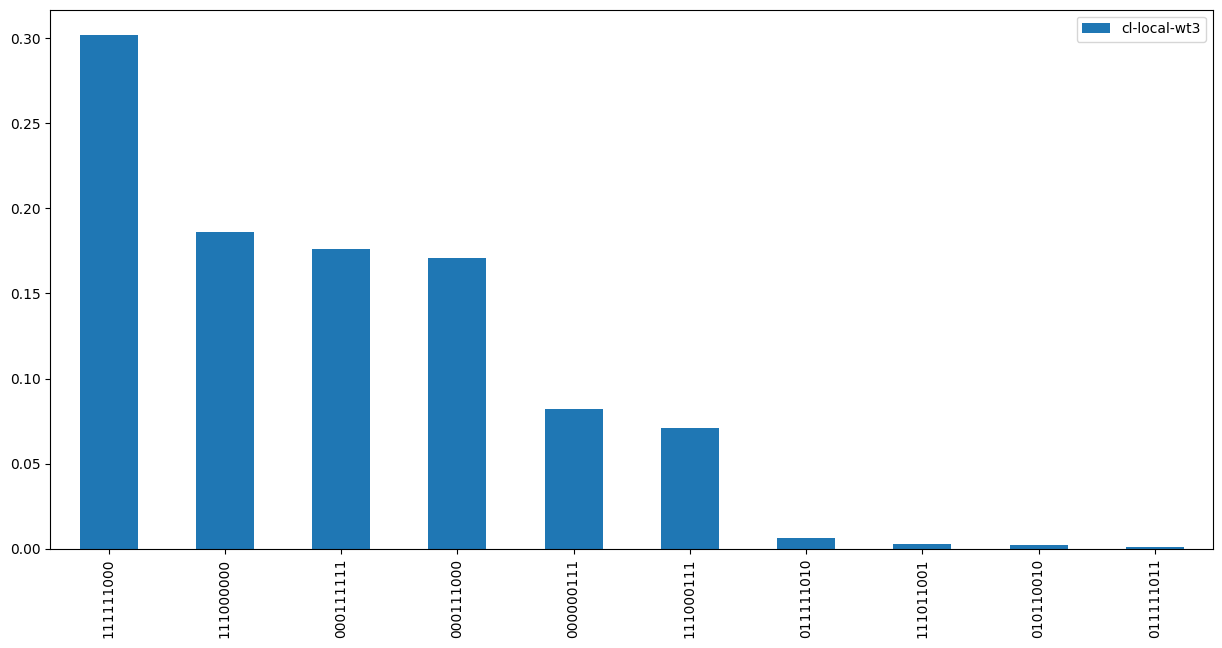

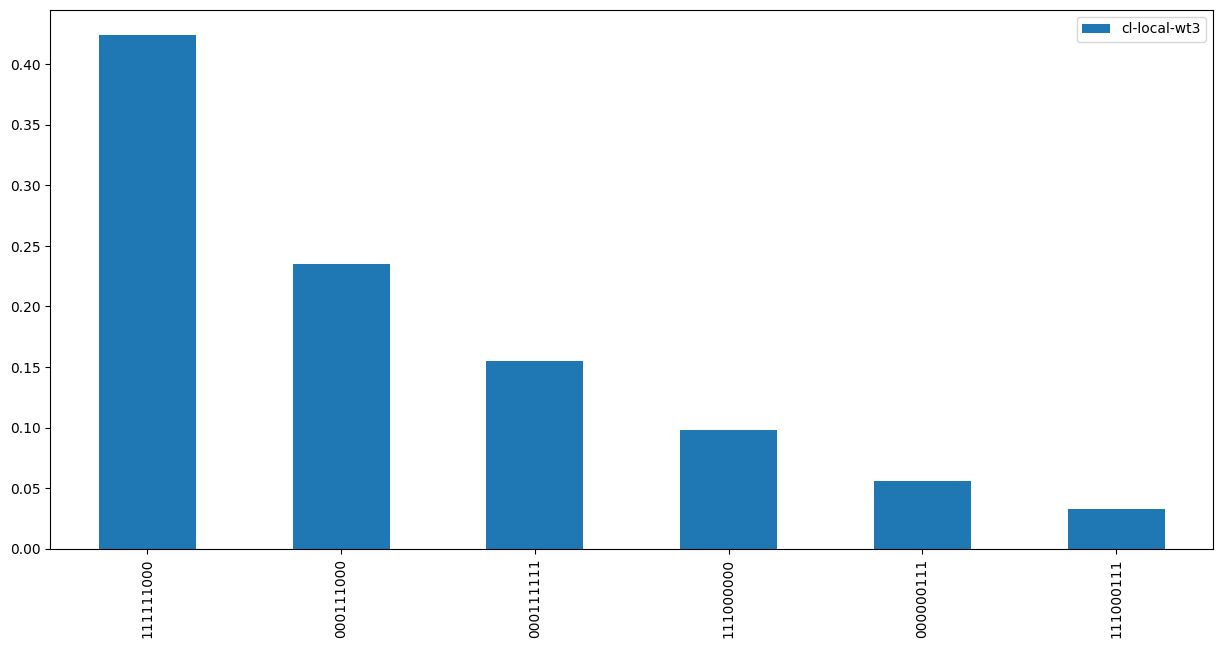

In [65]:
mcmc_type = 'cl-local-wt3' 
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(classical_mcmc(1000, DATA_E0[mcmc_type].model, temperature= beta_train,proposition_method= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )
plot_multiple_bargraphs( [DiscreteProbabilityDistribution(dict(classical_mcmc(1000, DATA_E0[mcmc_type].model, temperature= beta_train,initial_state= DATA_b3.get_sample(1)[0] , proposition_method= MCMC_SETTINGS[mcmc_type]['mixer']).get_accepted_dict(normalize=True) )).value_sorted_dict(reverse=True) ], [mcmc_type], [False], plot_first_few= 10 )

##### Model Summaries

            MODEL : param_model
Non-zero Interactions (J) : 36 / 36
Non-zero Bias (h) : 9 / 9
---------------------------------------------
Average Interaction Strength <|J|> :  0.4213866034572965
Average Bias Strength <|h|>:  0.03181993385882278
alpha :  1.2046990094569645
---------------------------------------------


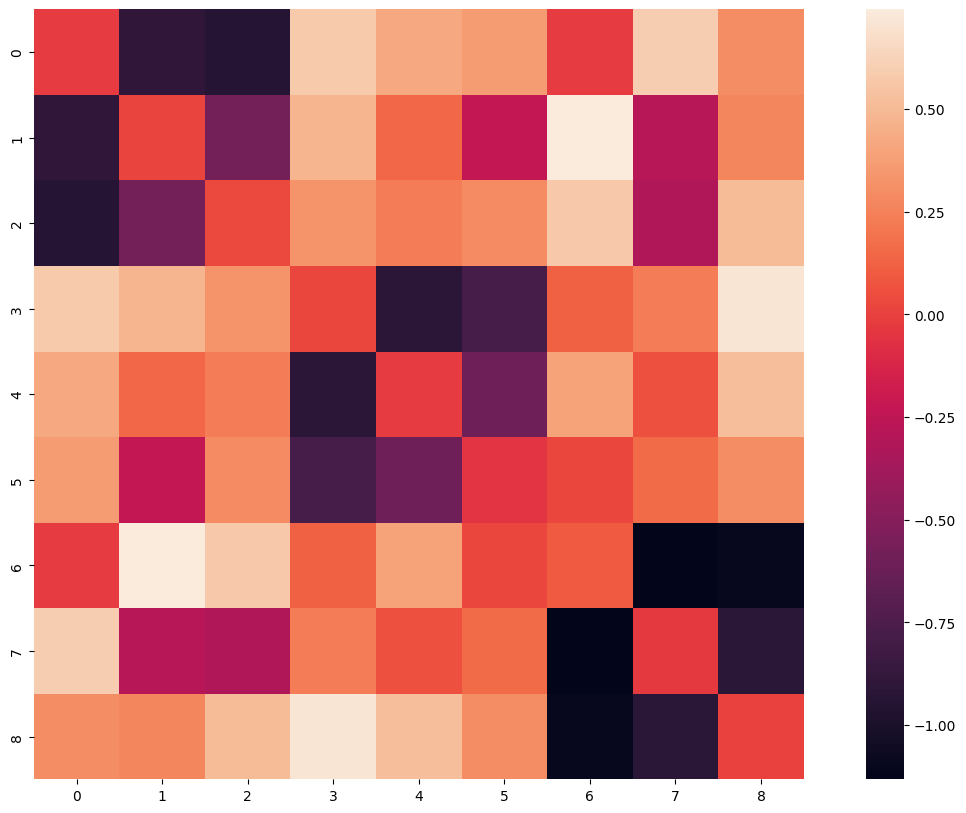

In [70]:
DATA_E0['cl-uniform'].model.model_summary()

            MODEL : param_model
Non-zero Interactions (J) : 40 / 36
Non-zero Bias (h) : 9 / 9
---------------------------------------------
Average Interaction Strength <|J|> :  0.4028809216888045
Average Bias Strength <|h|>:  0.03163101444458453
alpha :  1.2046990094569645
---------------------------------------------


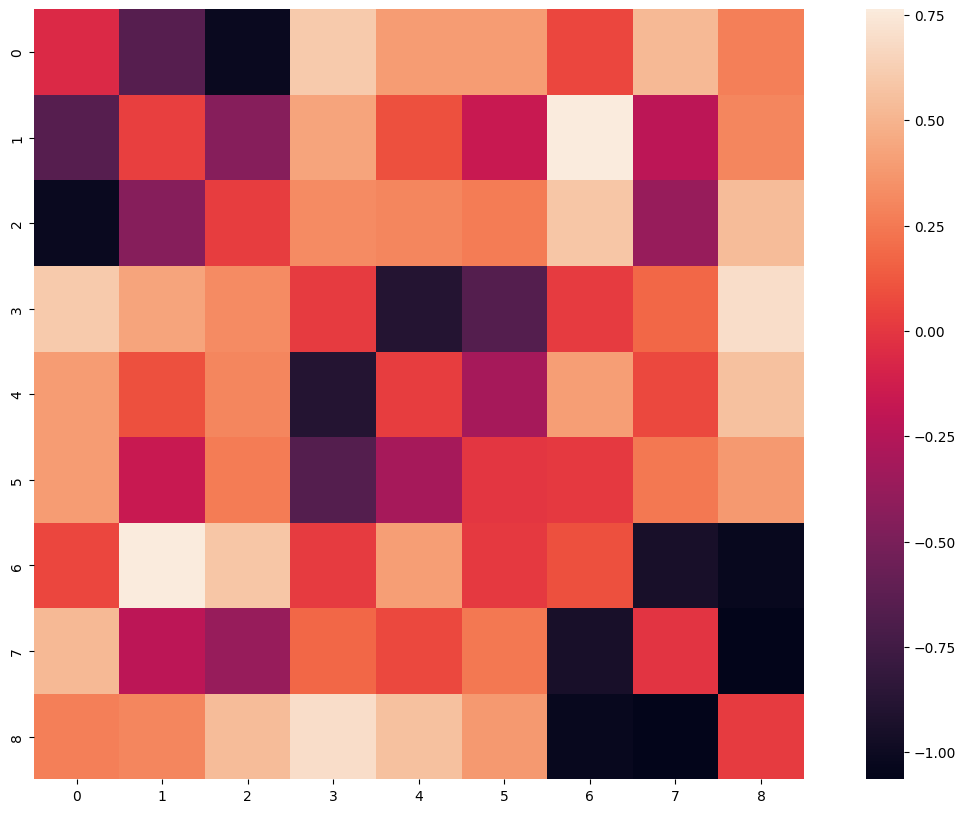

In [71]:
DATA_E0['cl-local-wt3'].model.model_summary()

            MODEL : param_model
Non-zero Interactions (J) : 36 / 36
Non-zero Bias (h) : 9 / 9
---------------------------------------------
Average Interaction Strength <|J|> :  0.3640231770658652
Average Bias Strength <|h|>:  0.05278336007575008
alpha :  1.2046990094569645
---------------------------------------------


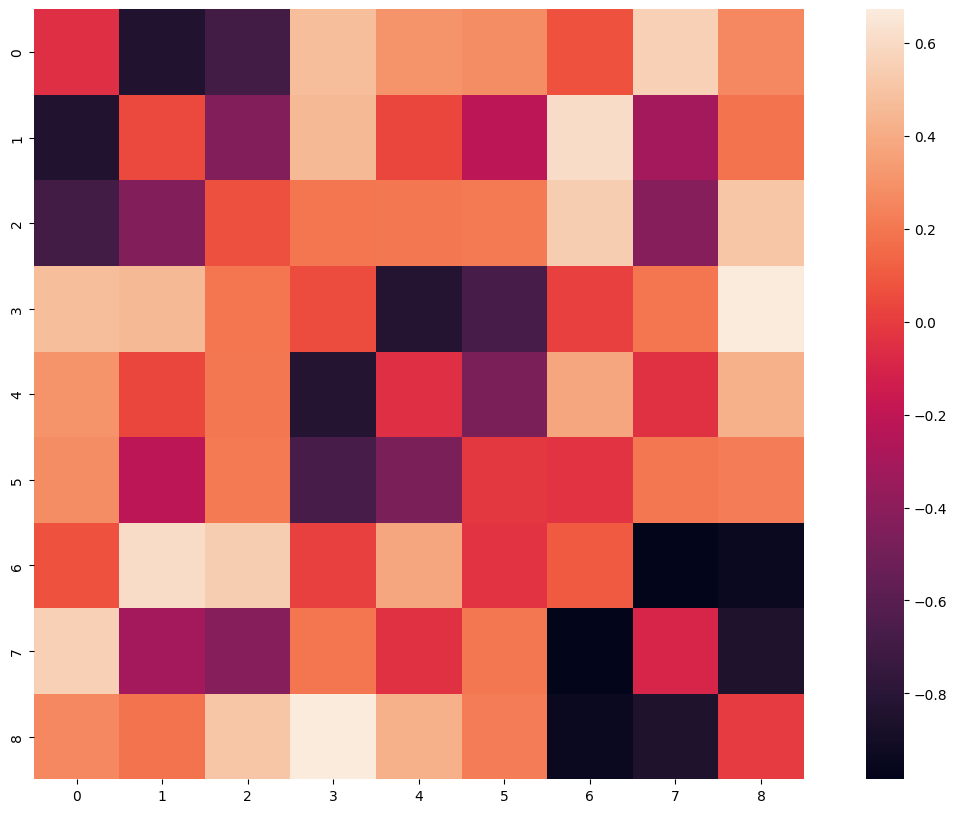

In [72]:
DATA_E0['qu-wt1'].model.model_summary()

            MODEL : param_model
Non-zero Interactions (J) : 36 / 36
Non-zero Bias (h) : 9 / 9
---------------------------------------------
Average Interaction Strength <|J|> :  0.3822953290579299
Average Bias Strength <|h|>:  0.03866312661213384
alpha :  1.2046990094569645
---------------------------------------------


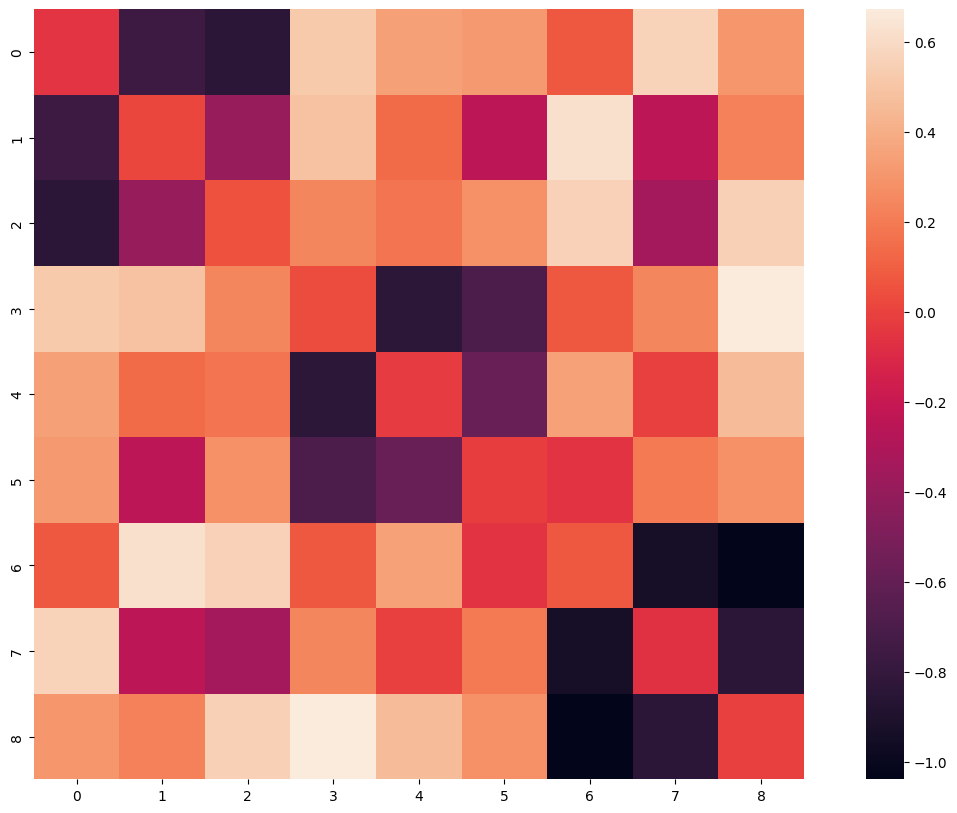

In [73]:
DATA_E0['qu-wt3'].model.model_summary()

            MODEL : param_model
Non-zero Interactions (J) : 40 / 36
Non-zero Bias (h) : 9 / 9
---------------------------------------------
Average Interaction Strength <|J|> :  0.38795143066079046
Average Bias Strength <|h|>:  0.0413721952280887
alpha :  1.2046990094569645
---------------------------------------------


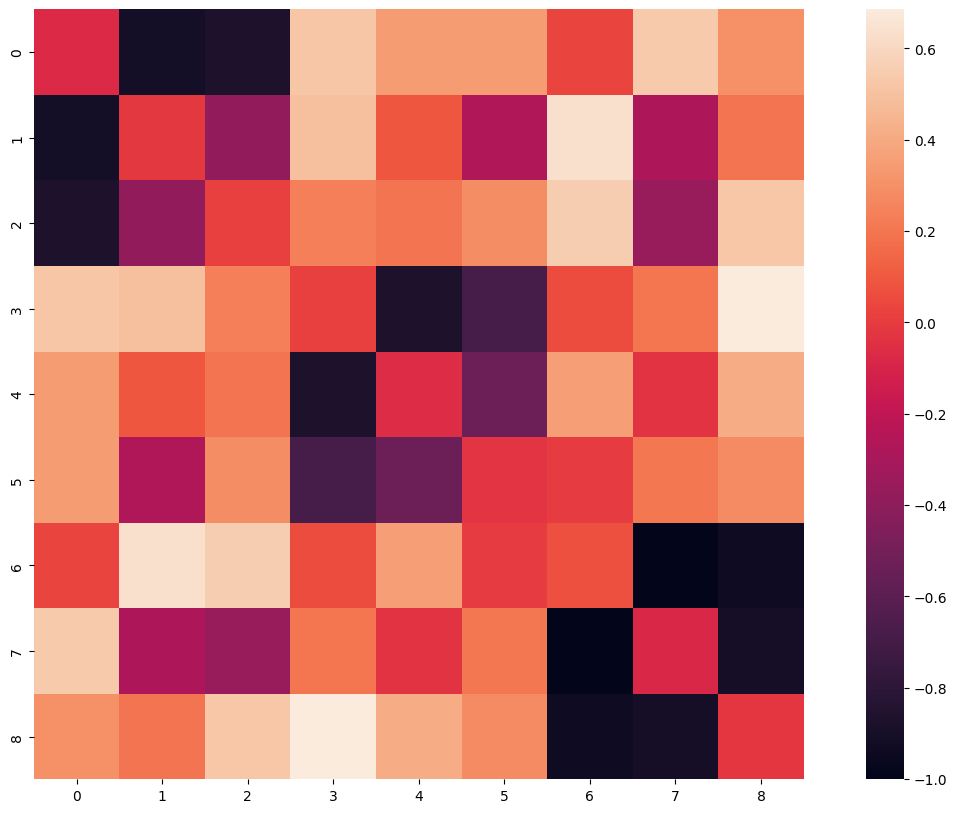

In [74]:
DATA_E0['qu-wt2'].model.model_summary()

            MODEL : param_model
Non-zero Interactions (J) : 36 / 36
Non-zero Bias (h) : 9 / 9
---------------------------------------------
Average Interaction Strength <|J|> :  0.29811326713913855
Average Bias Strength <|h|>:  0.08516123168659984
alpha :  1.2046990094569645
---------------------------------------------


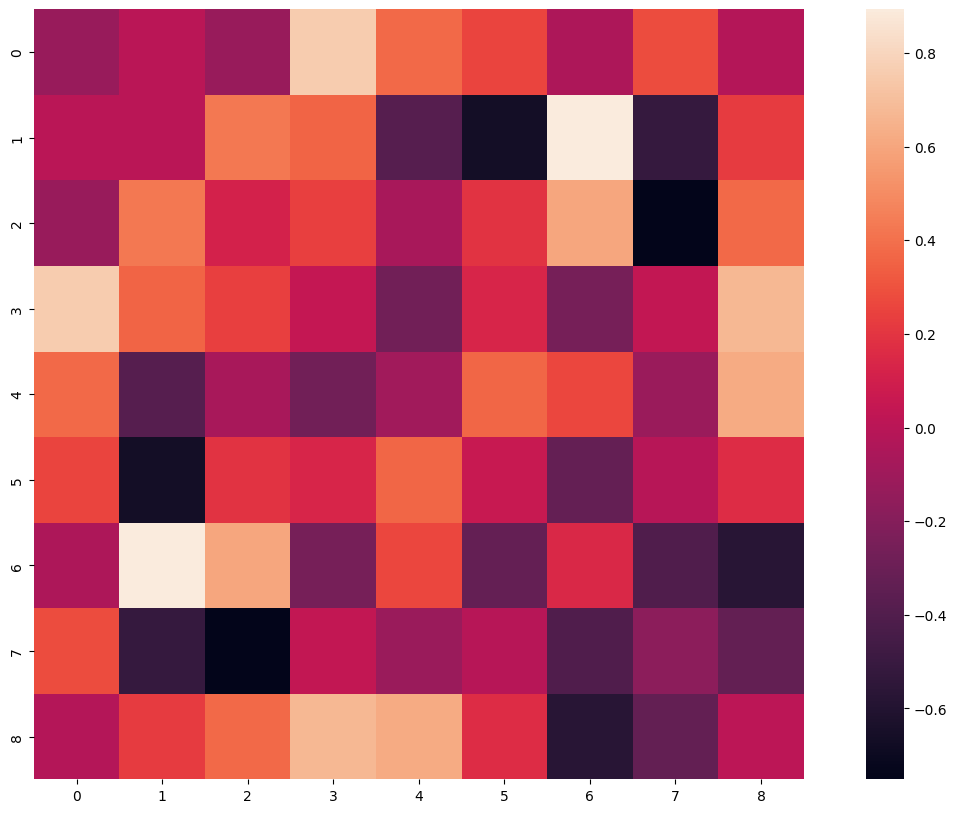

In [75]:
DATA_E0['qu-stabilizers-wt3'].model.model_summary()